<a href="https://colab.research.google.com/github/DorSkoler/BigData/blob/main/Final_Project_Big_Data_Platform_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -O ./spark-3.3.1-bin-hadoop3.tgz  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar zxvf ./spark-3.3.1-bin-hadoop3.tgz
!pip install spark
!pip install pyspark
!pip install findspark
#!pip install git+https://github.com/titicaca/spark-iforest
#!pip install git+https://github.com/cehorn/GLRM.git
#!pip install spark-iforest
#!pip install pyspark_iforest
#!pip install mlflow
#!pip install synapse

--2023-02-16 16:05:17--  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299350810 (285M) [application/x-gzip]
Saving to: ‘./spark-3.3.1-bin-hadoop3.tgz’

./spark-3.3.1-bin-h 100%[===================>] 285.48M   255MB/s    in 1.1s    

2023-02-16 16:05:18 (255 MB/s) - ‘./spark-3.3.1-bin-hadoop3.tgz’ saved [299350810/299350810]

spark-3.3.1-bin-hadoop3/
spark-3.3.1-bin-hadoop3/LICENSE
spark-3.3.1-bin-hadoop3/NOTICE
spark-3.3.1-bin-hadoop3/R/
spark-3.3.1-bin-hadoop3/R/lib/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.1-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3

In [2]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [3]:
import findspark
import random
import pyspark
findspark.init()
#import mlflow

from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import *
from pyspark.ml import Pipeline

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [7]:
# Other imports
import math
import seaborn as sns
from numpy.lib.function_base import average
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import pyspark
from pyspark.rdd import RDD
from pyspark import SparkContext

# Uploading the CSV Files

Importing all of the relevant datasets

In [124]:
df_house_1br = spark.read.csv("/content/sample_data/Neighborhood_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv", header=True, inferSchema=True)
df_house_2br = spark.read.csv("/content/sample_data/Neighborhood_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv", header=True, inferSchema=True)
df_house_3br = spark.read.csv("/content/sample_data/Neighborhood_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv", header=True, inferSchema=True)
df_house_4br = spark.read.csv("/content/sample_data/Neighborhood_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv", header=True, inferSchema=True)
df_house_5br = spark.read.csv("/content/sample_data/Neighborhood_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv", header=True, inferSchema=True)
df_for_sale_inventory = spark.read.csv("/content/sample_data/Metro_invt_fs_uc_sfrcondo_sm_week.csv", header=True, inferSchema=True)
df_rent = spark.read.csv("/content/sample_data/City_zori_sm_sa_month.csv", header=True, inferSchema=True)

df_house_1brs = spark.read.csv("/content/sample_data/Value1Room.csv", header=True, inferSchema=True)
df_house_2brs = spark.read.csv("/content/sample_data/Value2Room.csv", header=True, inferSchema=True)
df_house_3brs = spark.read.csv("/content/sample_data/Value3Room.csv", header=True, inferSchema=True)
df_house_4brs = spark.read.csv("/content/sample_data/Value4Room.csv", header=True, inferSchema=True)
df_house_5brs = spark.read.csv("/content/sample_data/Value5Room.csv", header=True, inferSchema=True)

# Exploratory Data Analysis (EDA)

## Plotting top 10 cities rent prices

93


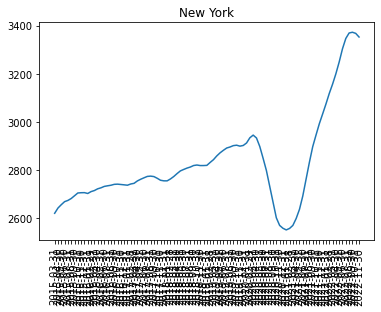

93


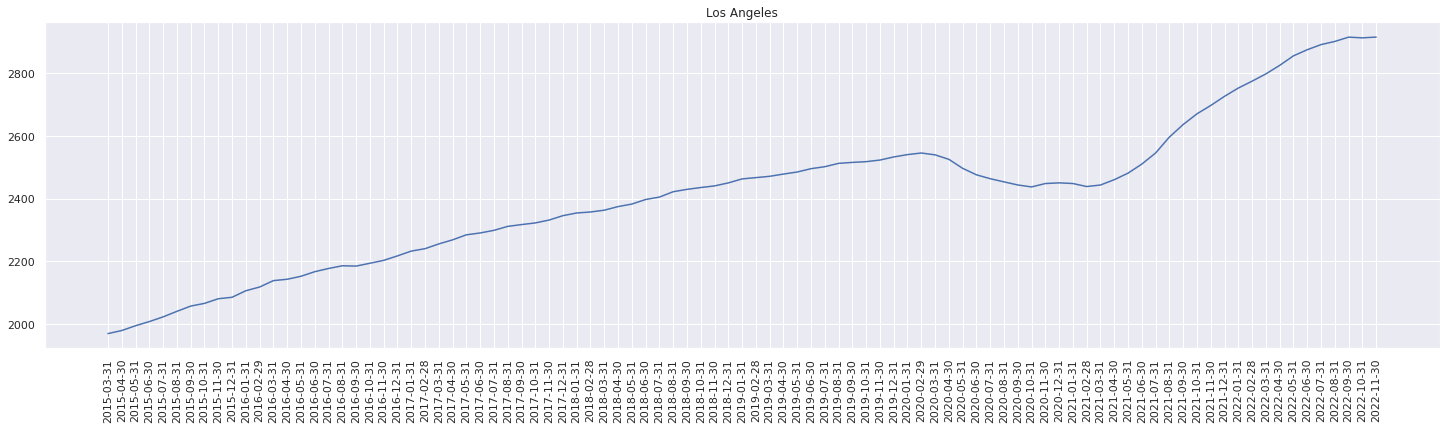

93


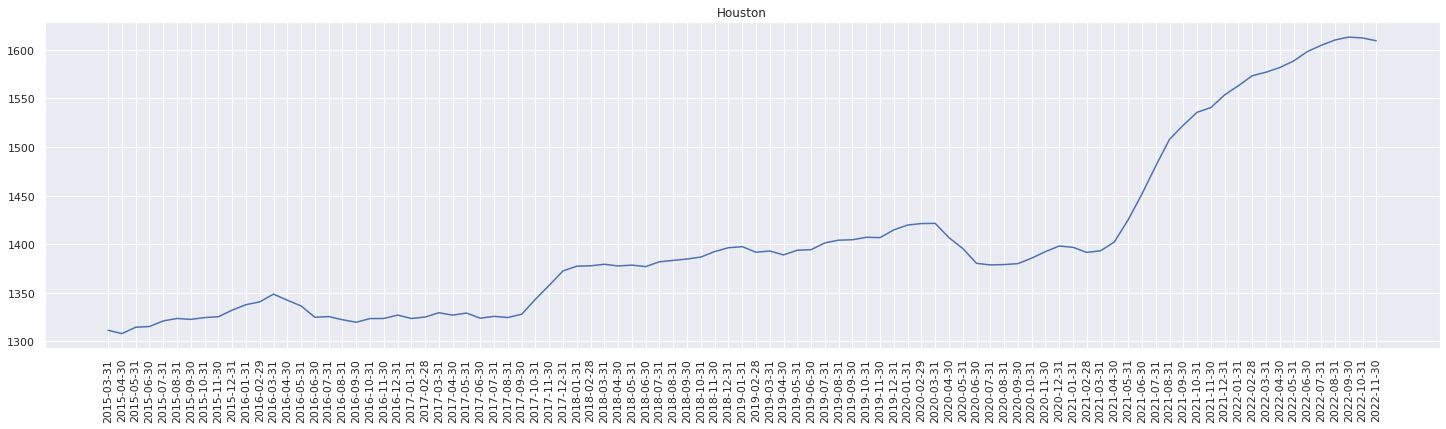

93


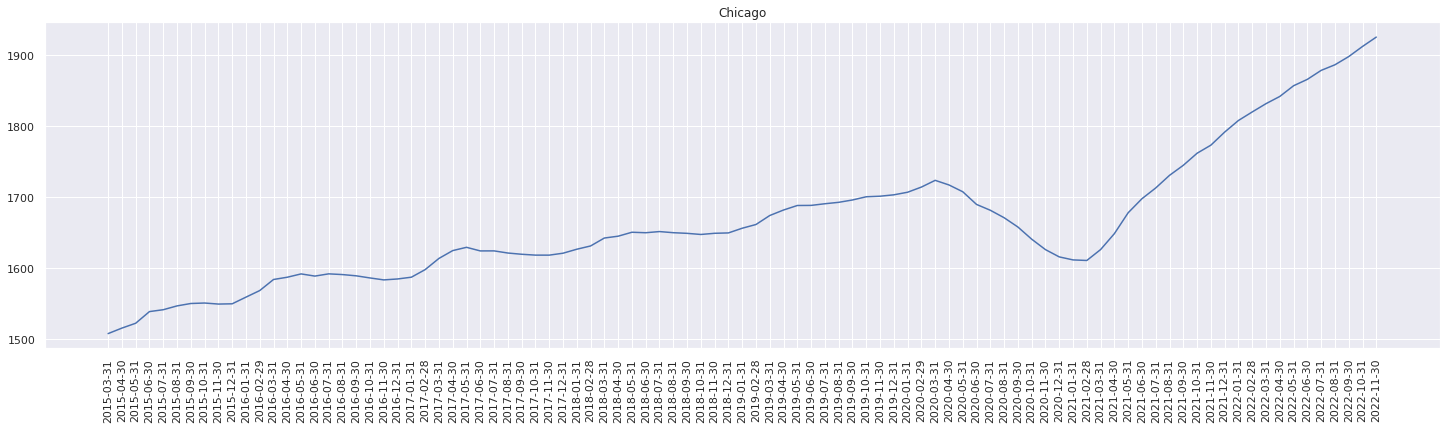

93


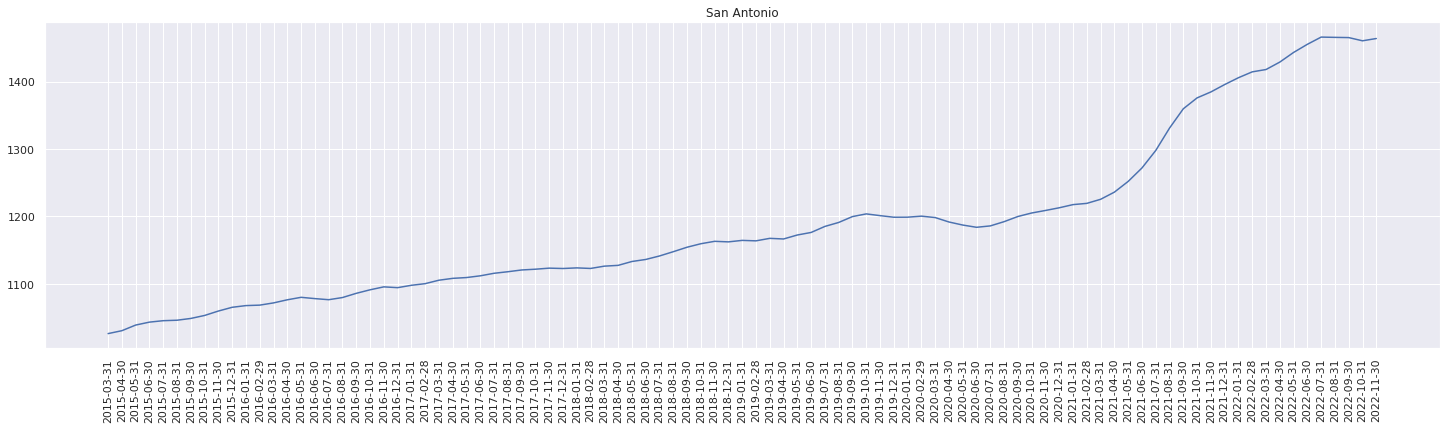

93


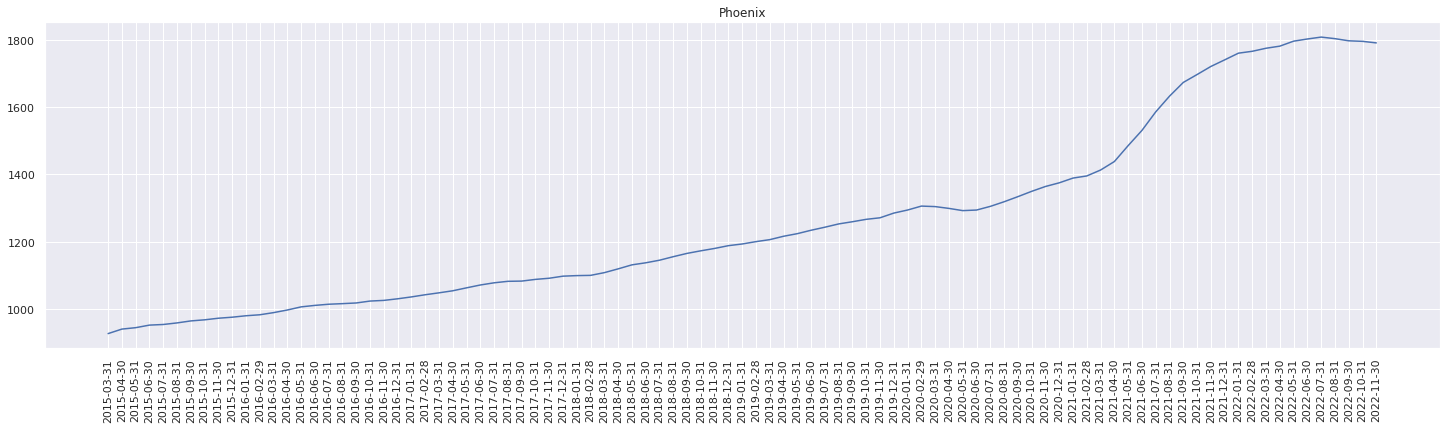

93


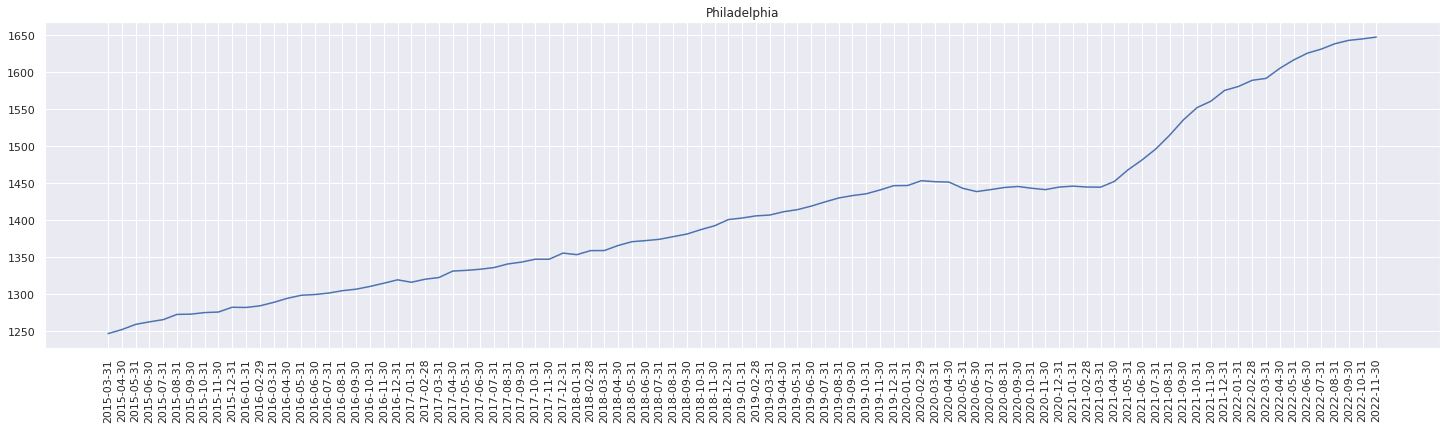

93


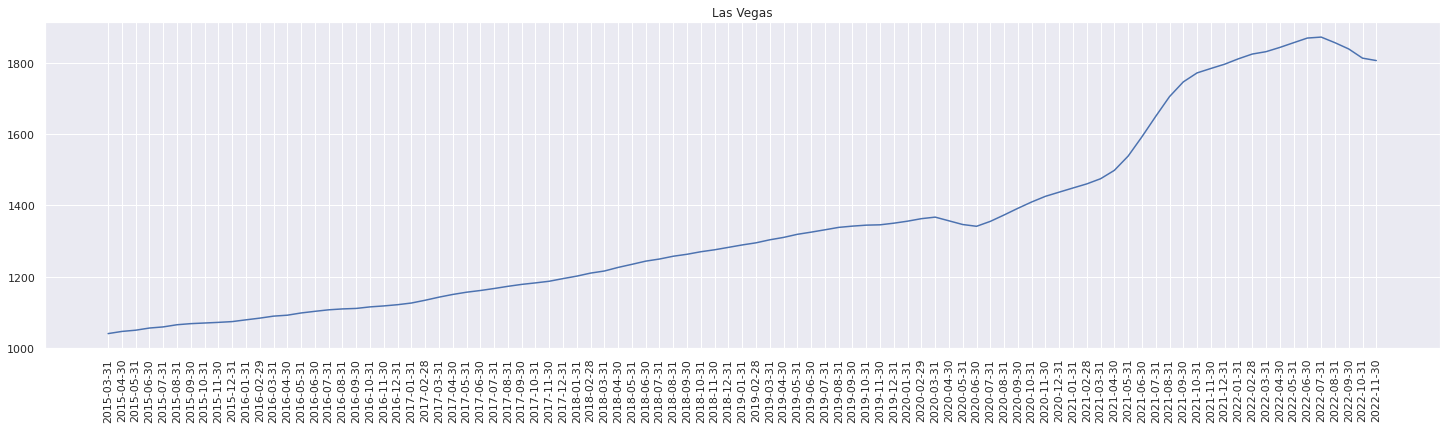

93


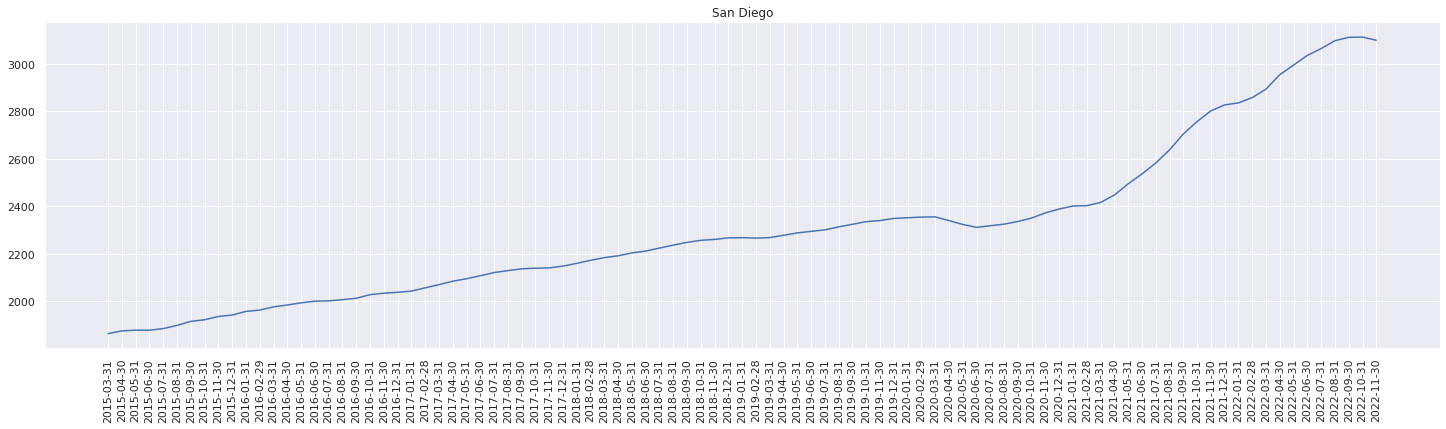

93


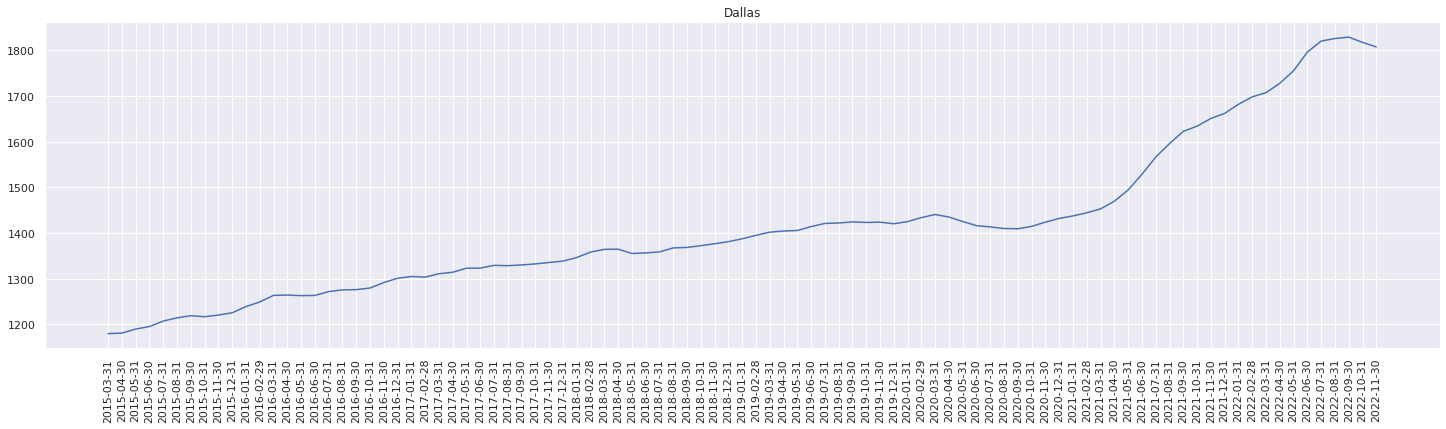

93


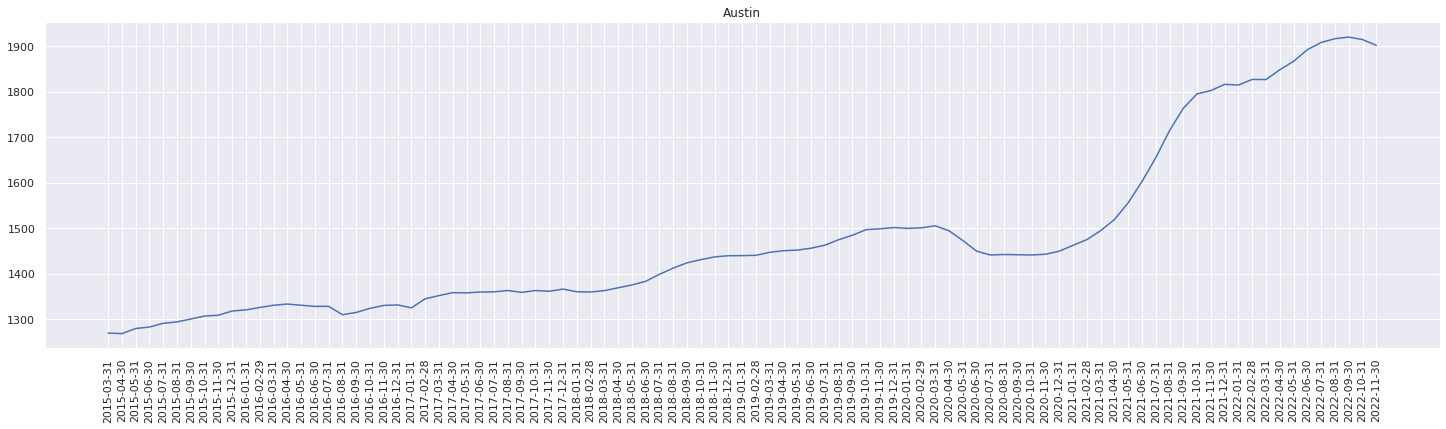

In [15]:
vals_rent = df_rent.collect()[0][8:]
dates_rent = df_rent.schema.names[8:]
only_months = [f"{x[5:7]}.{x[2:4]}" for x in dates_rent]


def plot(x, y):
  """Function that takes dates and data and generates lineplot out of it"""
  xs = df_rent.schema.names[8:]
  print(len(x))
  sns.lineplot(y=y[8:], x=x)
  sns.set(rc={'figure.figsize':(25,6)})
  plt.title(y['RegionName'])
  plt.xticks(rotation='90')
  plt.show()

i = 0
# Iterate over the rent dataframe and stop on the 10th itiration 
for row in df_rent.collect():
  i+=1
  # Send to rent function, X = dates, Y = data of city
  plot(x=dates_rent , y=row)
  if i > 10:
    break

## Plotting the top 10 cities house value by # of bedrooms


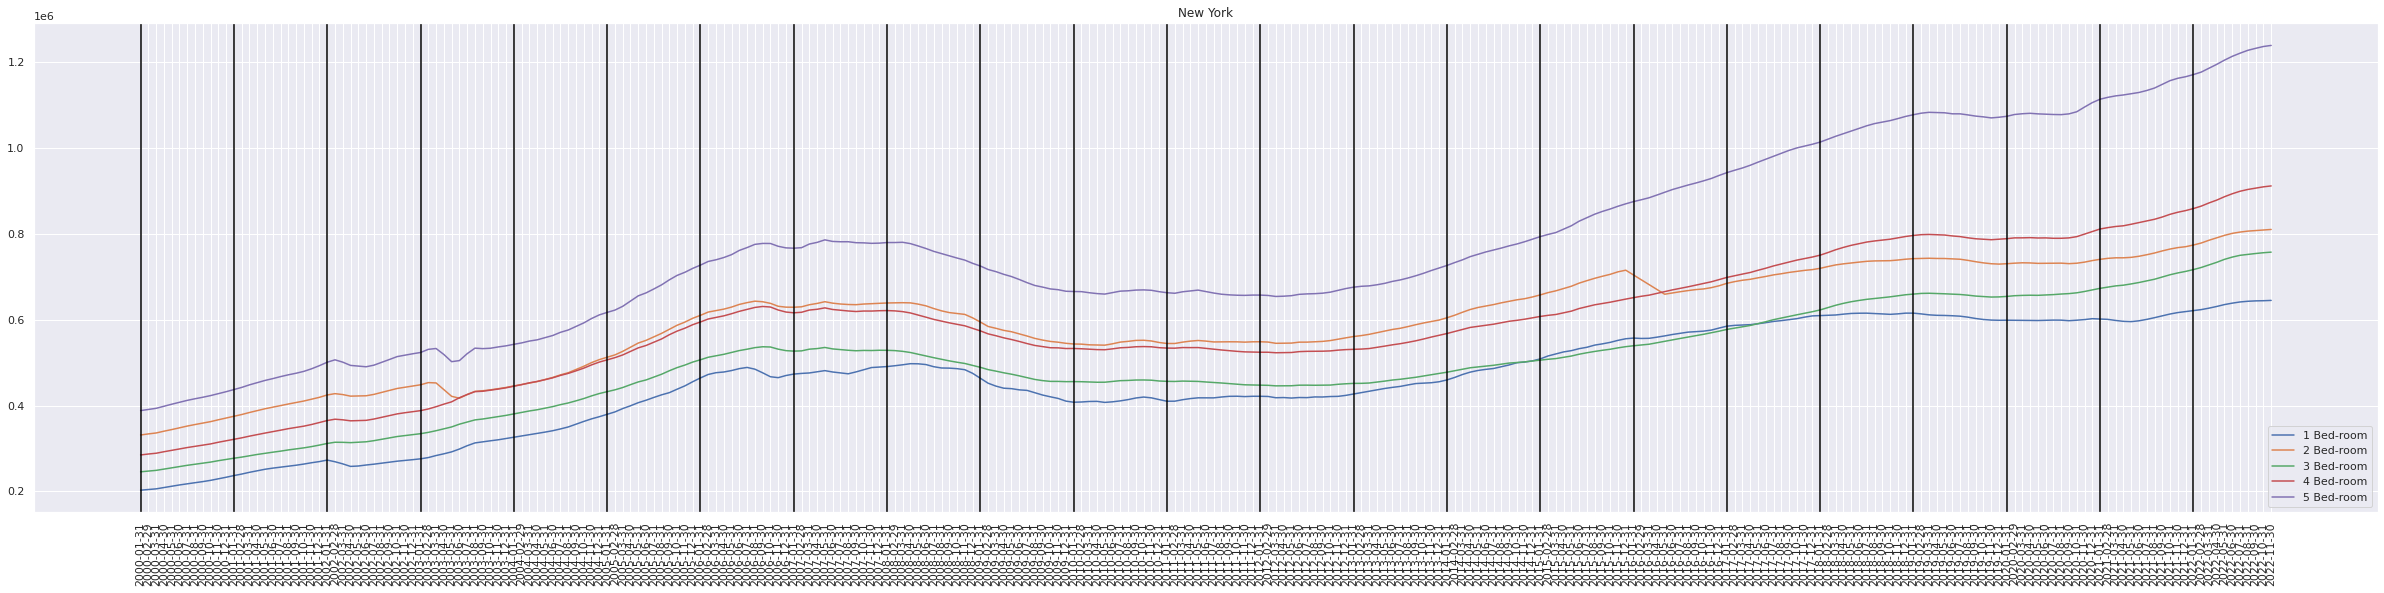

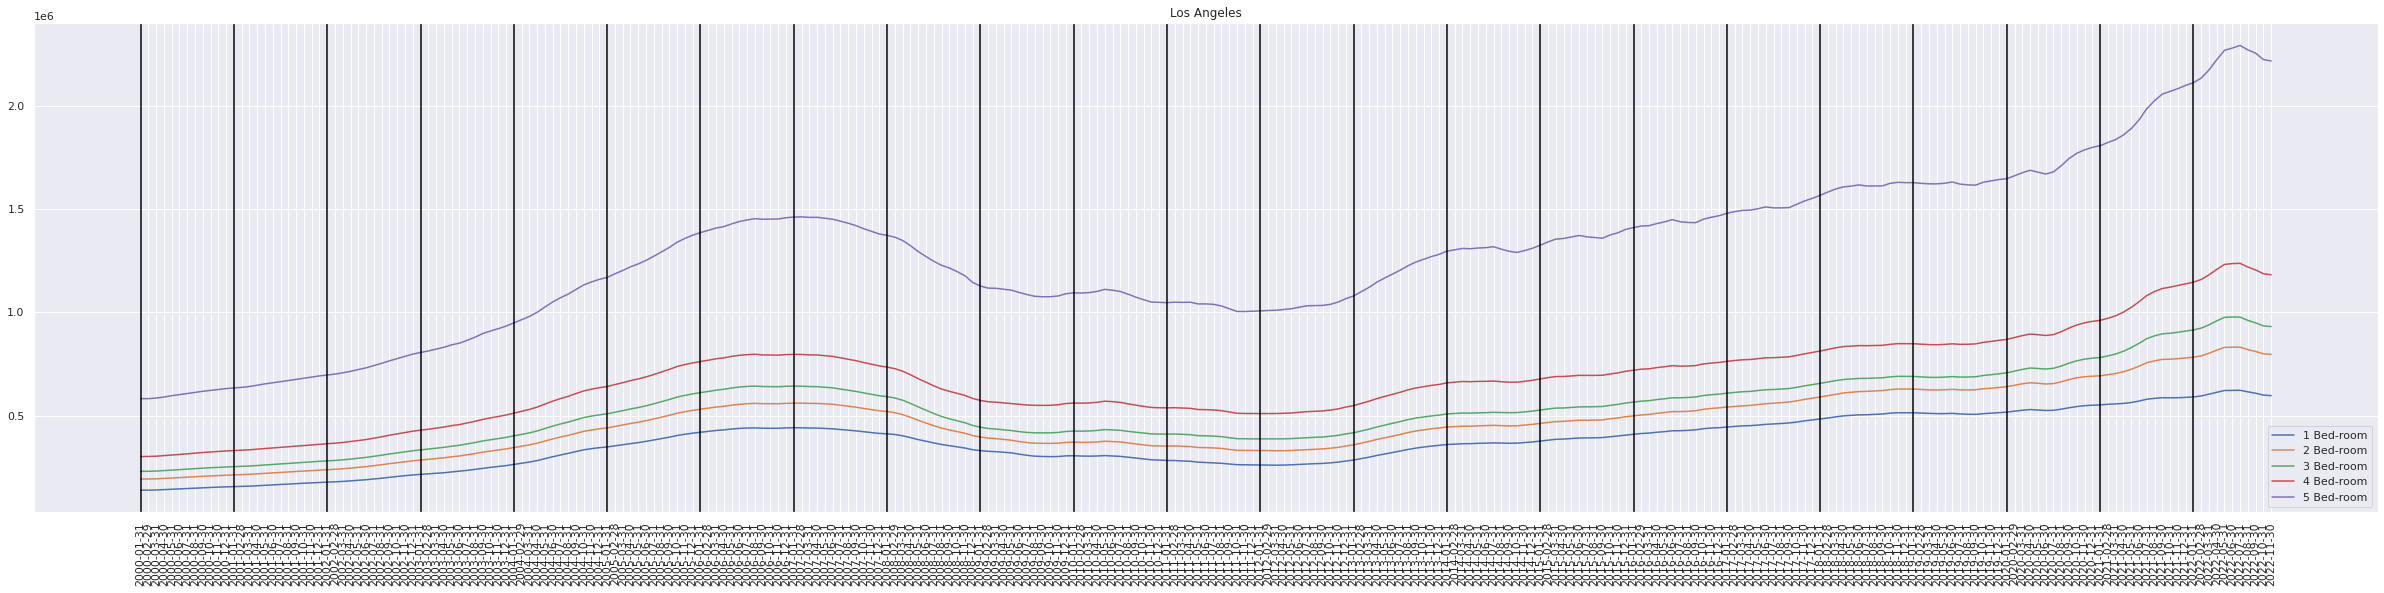

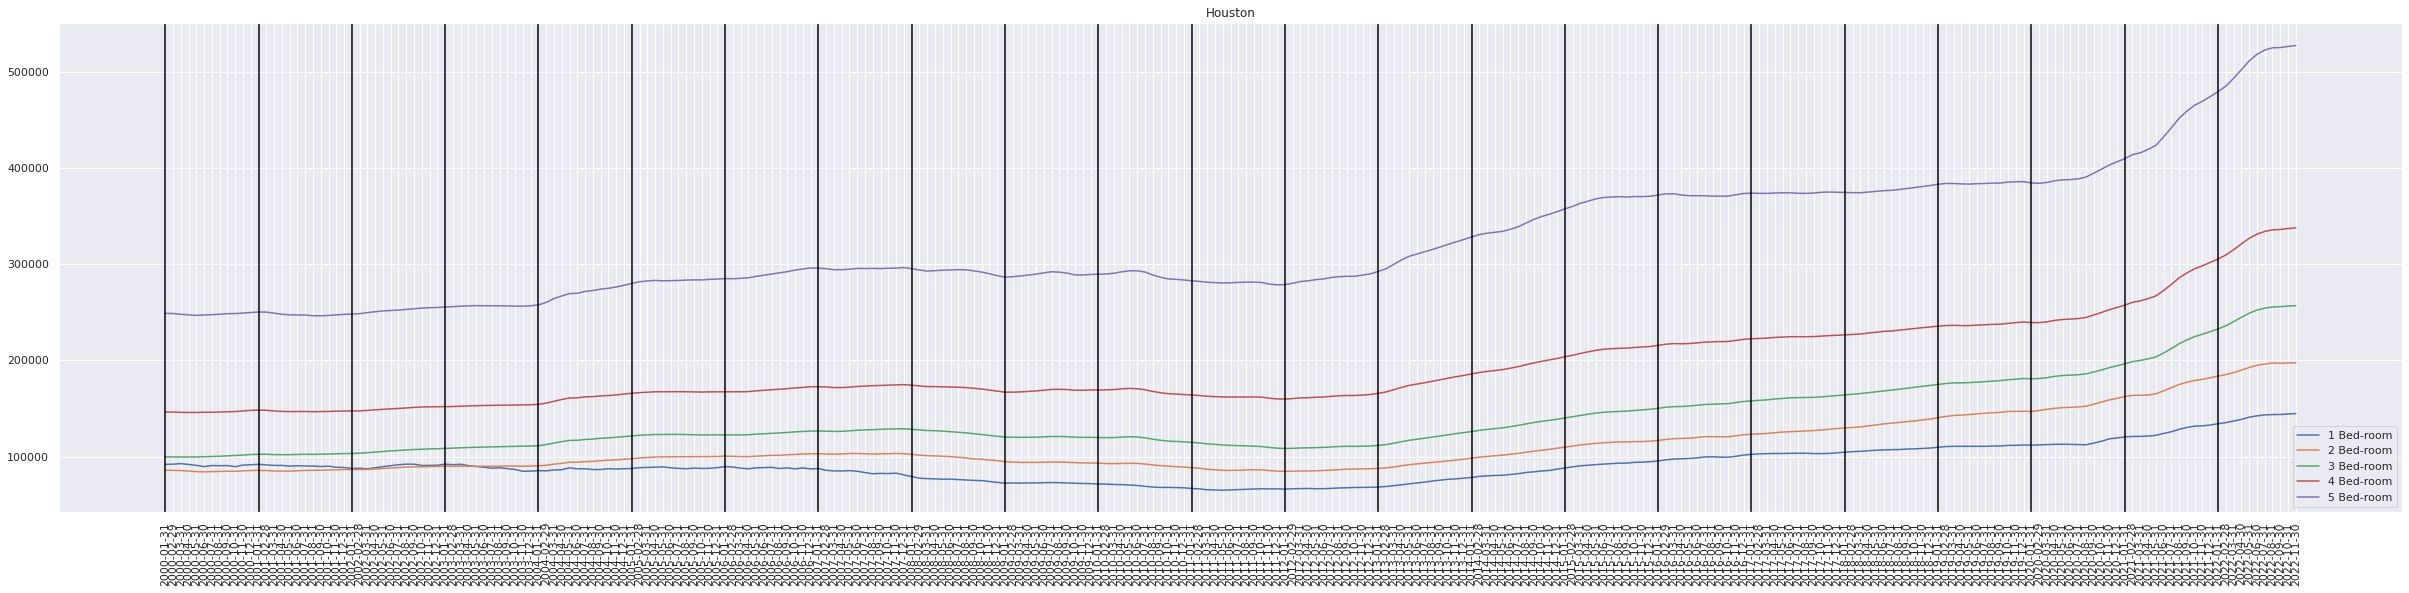

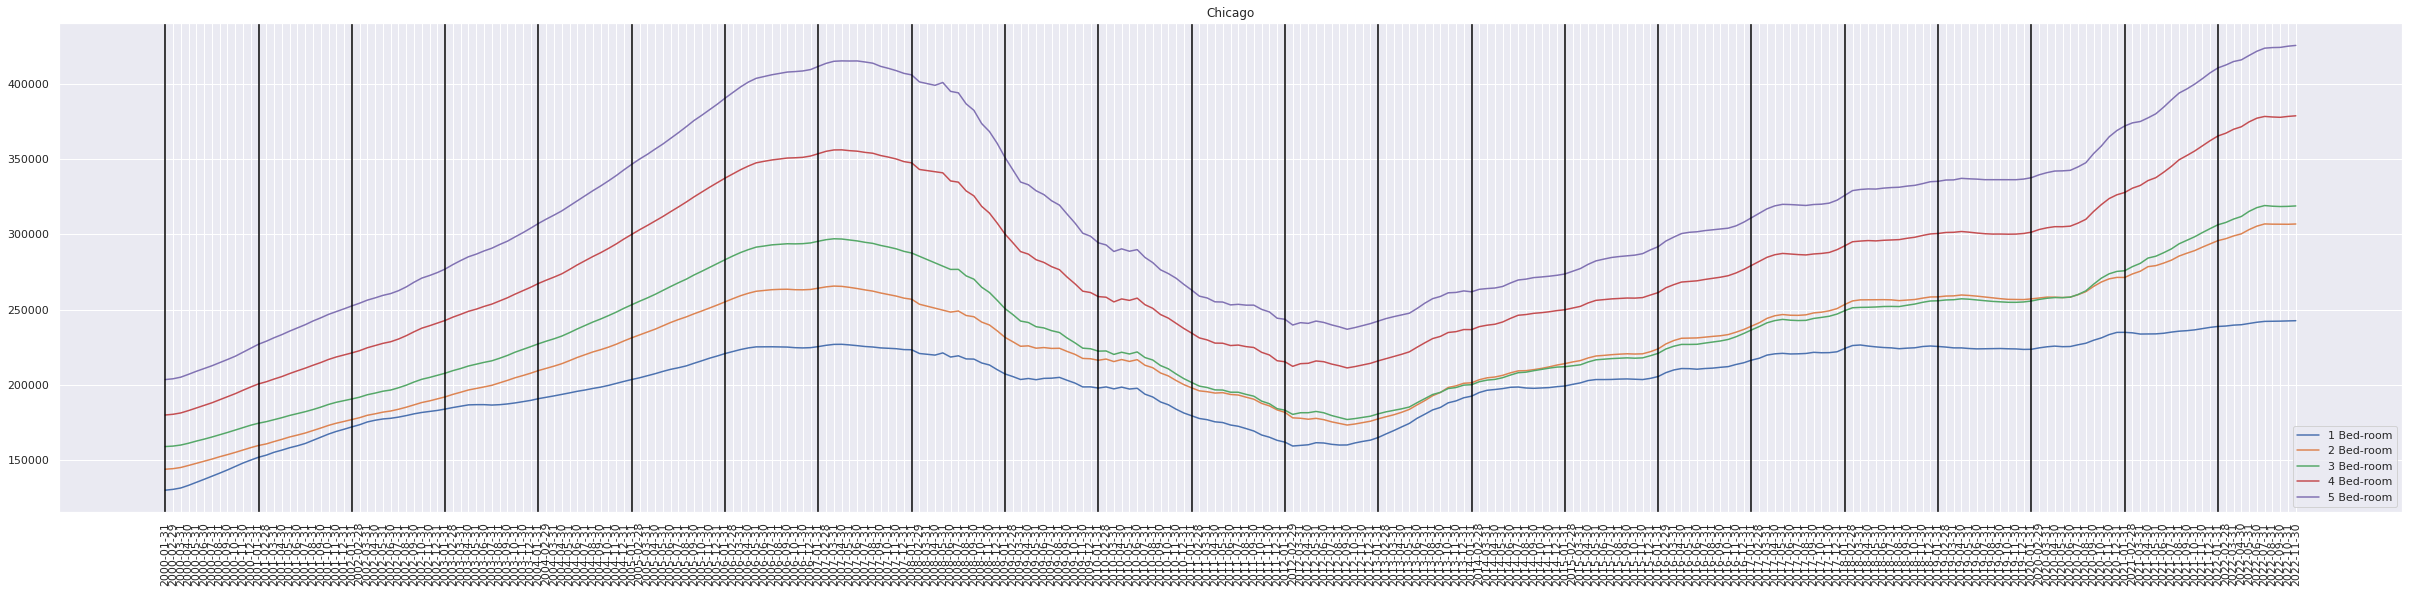

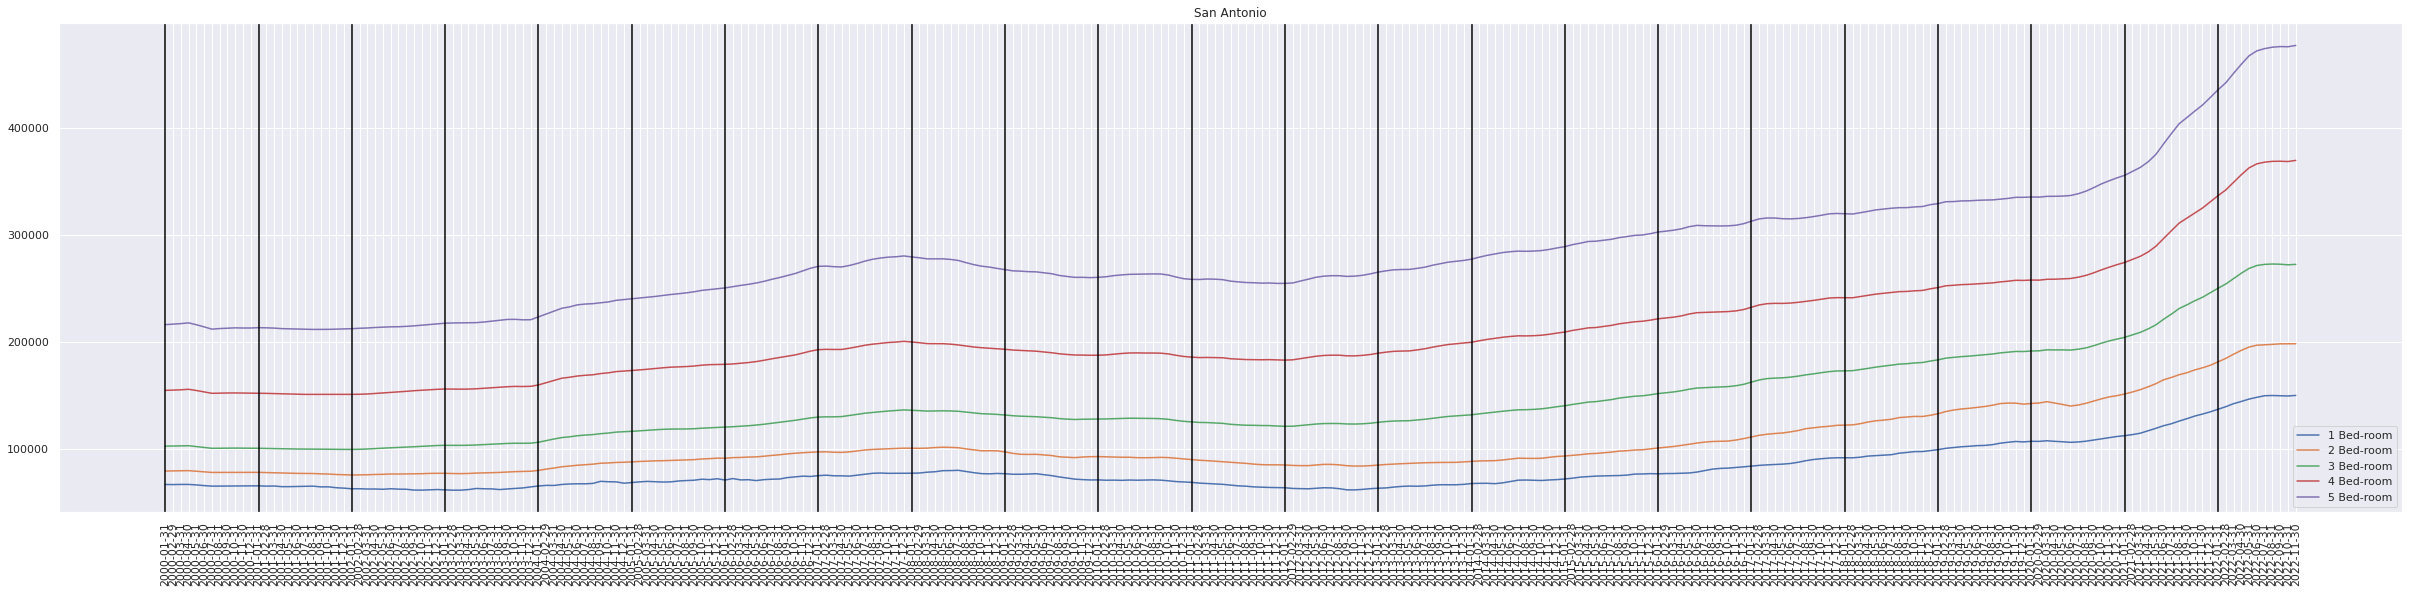

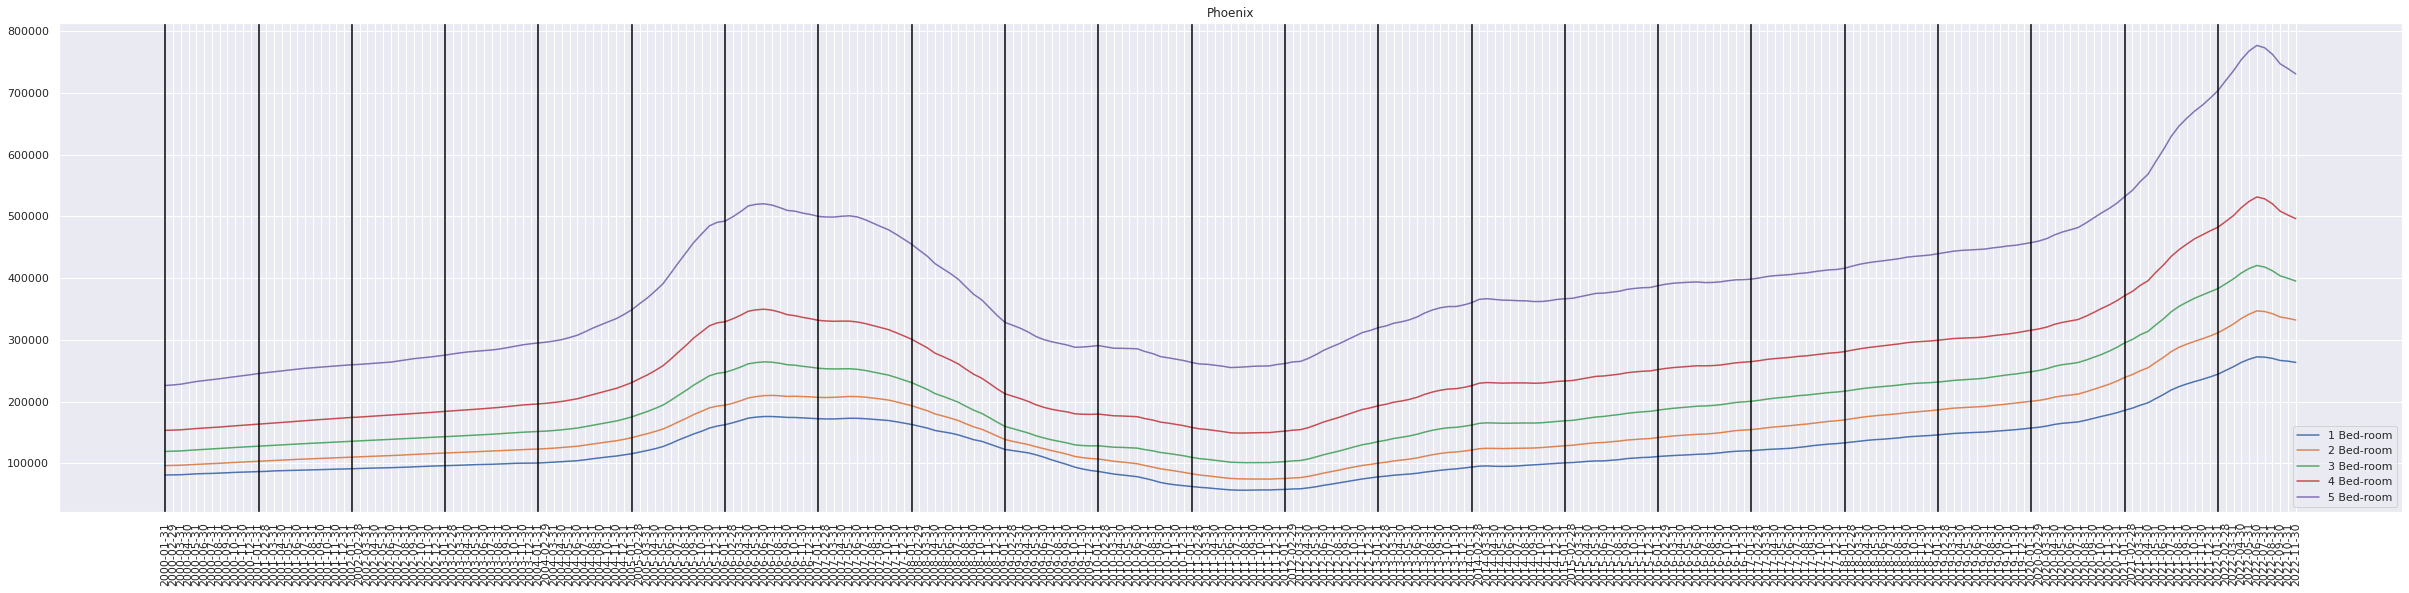

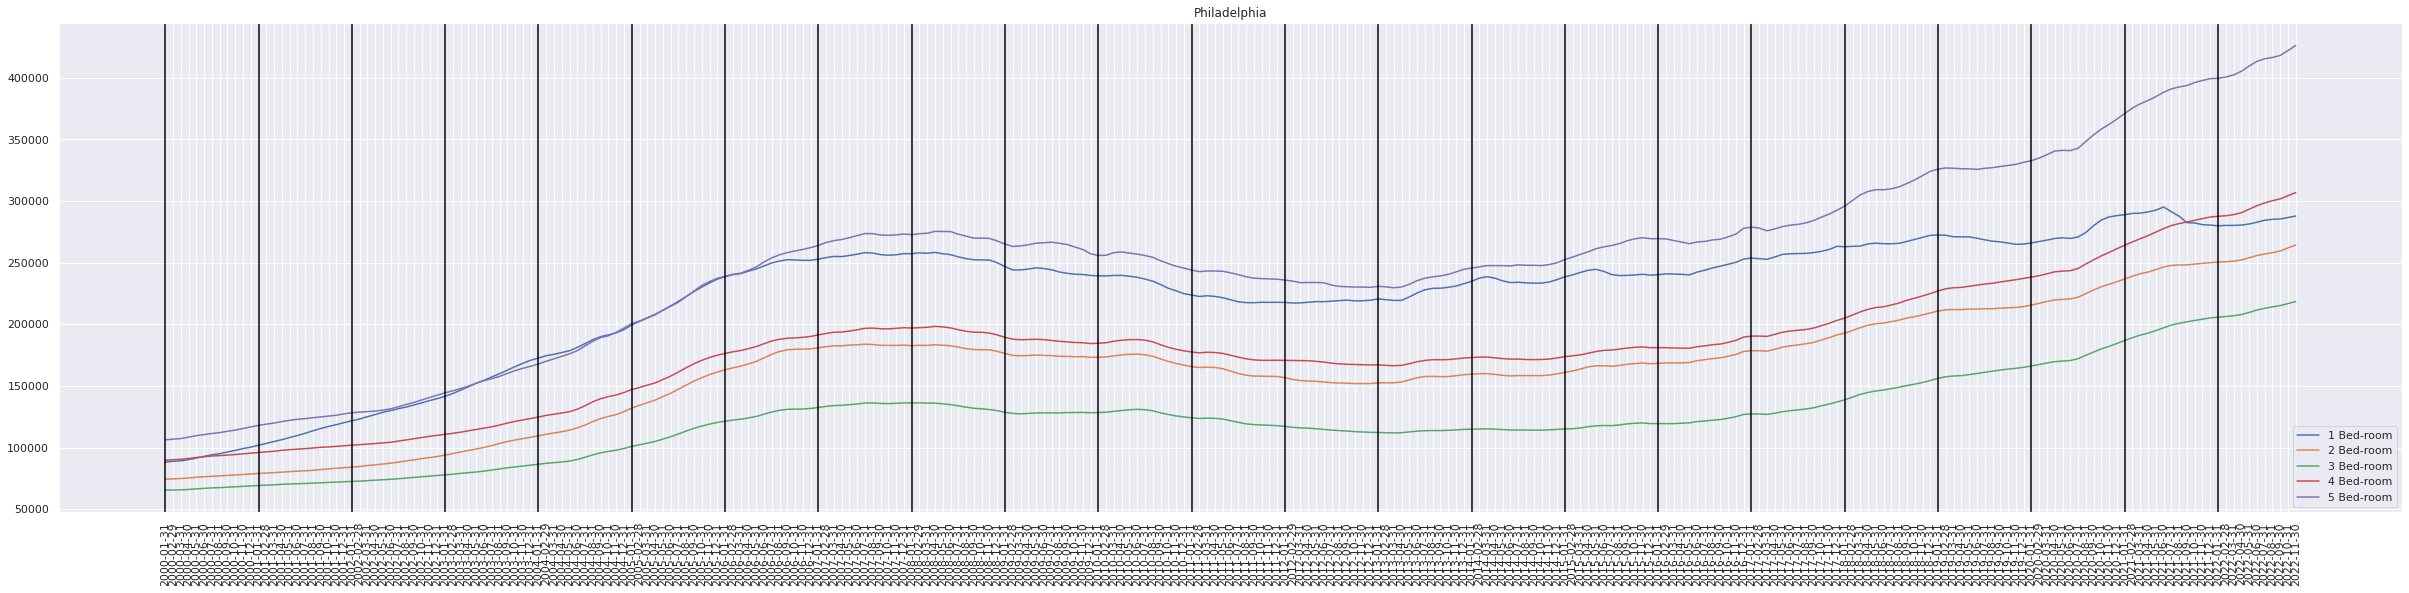

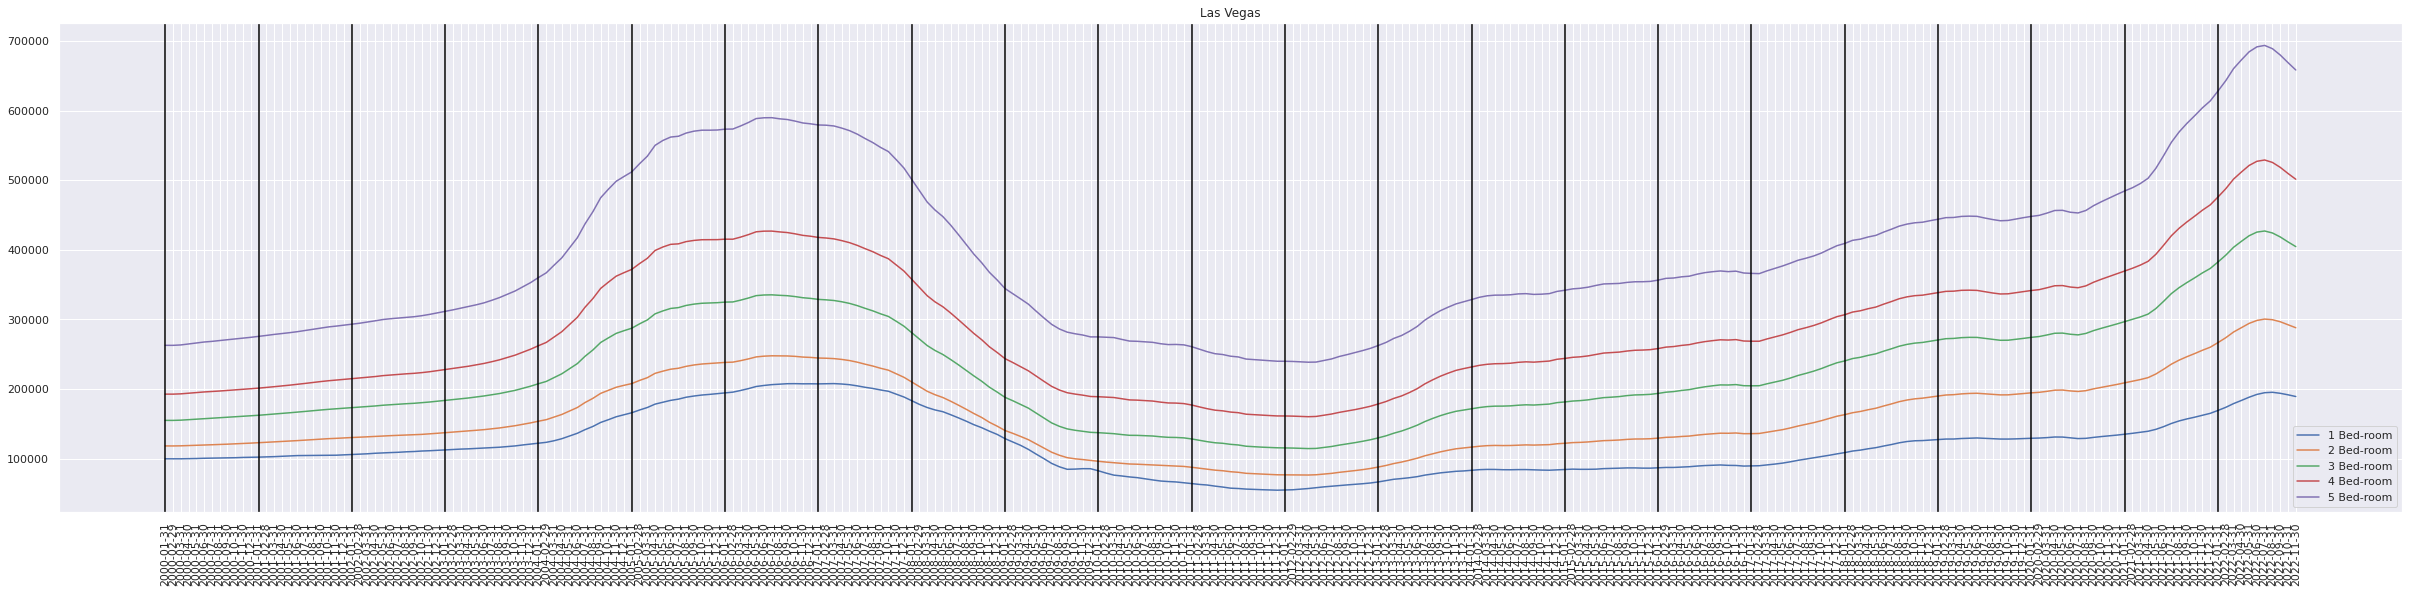

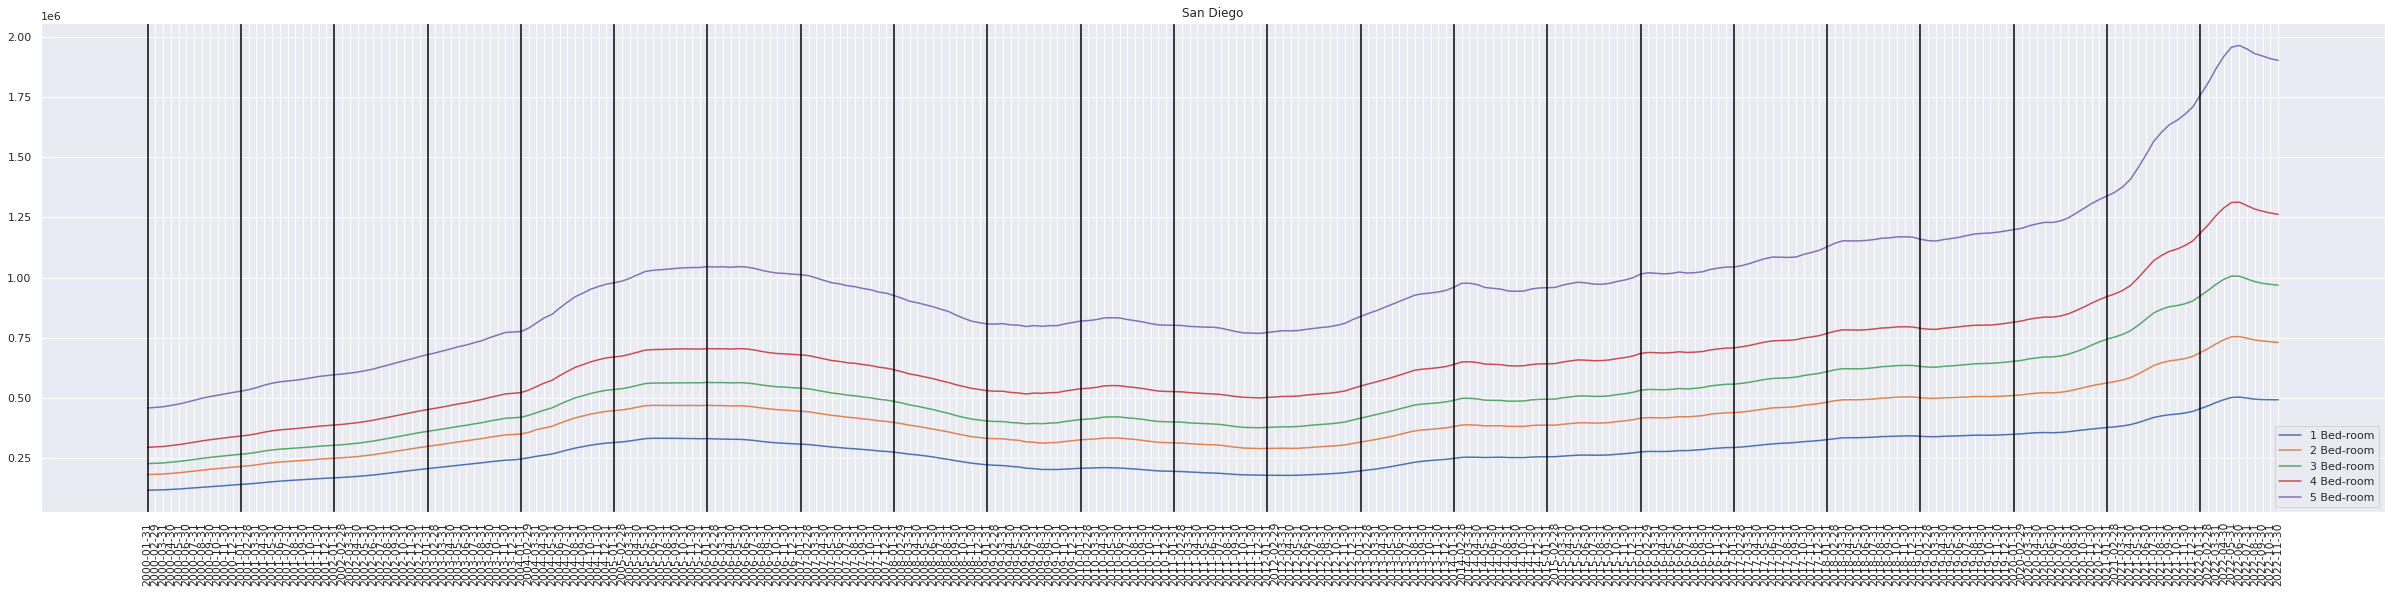

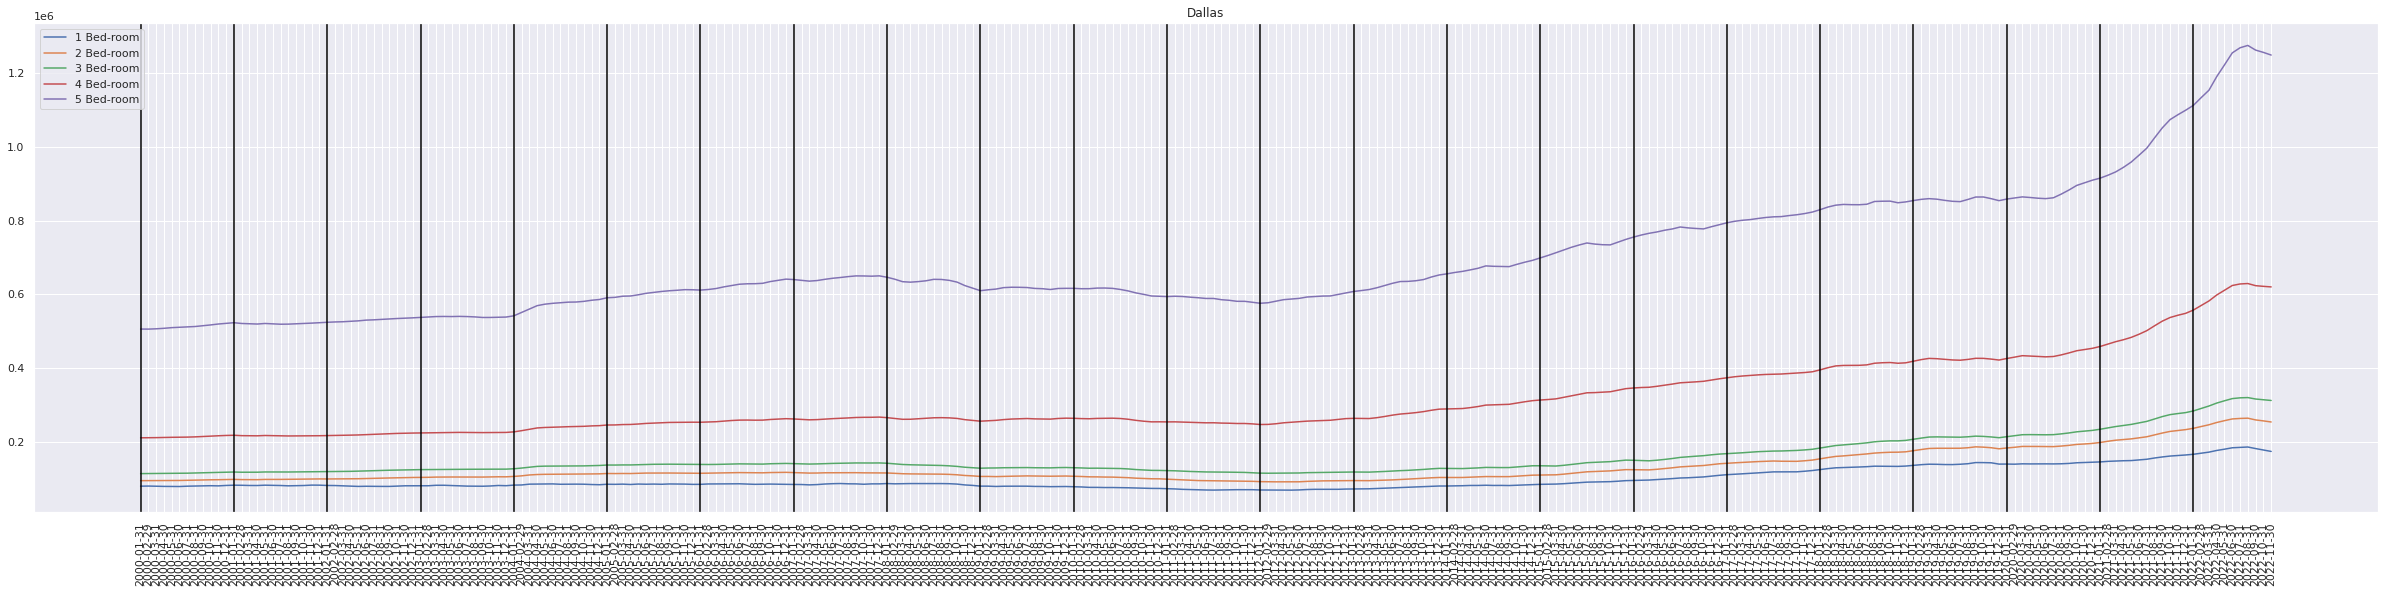

In [125]:
from pandas._config import dates
from pandas.io.sql import date

# Insert dataframes into a list
dfs = [df_house_1brs,
       df_house_2brs,
       df_house_3brs,
       df_house_4brs,
       df_house_5brs]

# Iterate over 10 cities in each dataframe from the list dfs
for i in range(0,10,1):
  data = []
  for j in range(0,5,1):
    row = []
    # Create variables
    dates_rent = dfs[j].schema.names[8:]
    row_list = dfs[j].collect()
    
    for info in row_list[i][8:]:
      row.append(info)

    # Set figure settings 
    sns.set(rc={'figure.figsize':(42,9)})
    # Create lineplot with the legend
    sns.lineplot(y=row, x = dates_rent, label=f'{j+1} Bed-room')
    # Set title 
    plt.title(dfs[j].collect()[i][2])
    plt.xticks(rotation='90')
  
  # Create a black vertical line every 12 months
  x = np.arange(0,len(dates_rent),12)
  for col in x:
    plt.axvline(x=col, color = 'black')
  plt.legend()
  plt.show()

# Investment Analysis

In [27]:
zhvi_df = spark.read.csv('/content/sample_data/City_zhvi_month.csv', multiLine=True, inferSchema=True, header=True)
zori_df = spark.read.csv('/content/sample_data/City_zori_month.csv', multiLine=True, inferSchema=True, header=True)

zhvi_df_metro = spark.read.csv('/content/sample_data/Metro_zhvi_month.csv', multiLine=True, inferSchema=True, header=True)
zori_df_metro = spark.read.csv('/content/sample_data/Metro_zori_month.csv', multiLine=True, inferSchema=True, header=True)

In [34]:
def combineDfs(zhvi, zori, valuesStart):
  """Join 2 data frames into one by RegionID"""
  oldColumns = zori.schema.names
  newColumns = zori.schema.names[0:valuesStart] + ['rent_' + x for x in zori.schema.names[valuesStart:]]
  zori = reduce(lambda data, idx: data.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), zori)
  return zhvi.join(zori,zhvi.RegionID ==  zori.RegionID,"inner")

def plot_this(x, y, region):
  """Plot graph with seaborn"""
  sns.lineplot(y=y, x=x)
  sns.set(rc={'figure.figsize':(25,6)})
  plt.title(region)
  plt.xticks(rotation='90')
  plt.show()


def monthlyYield(houseValue, rentValue, houseValueNextMonth):
  """Calculate the monthly yield by getting the House Value, Rent Value and House Value in the next month"""
  if houseValue is None or rentValue is None or houseValueNextMonth is None:
    return 0
  return ((rentValue / houseValue) + (houseValueNextMonth / houseValue))


def plots_lists(avgL, yieldL, fields):
  """Plot the top 5 highest average yield
      
  Keyword arguments:
  avgL -- dict with average yield by region
  yieldL -- dict with list of monthly yield by region
  fields -- all dates
  """
  default_value = -1e20
  for obj, value in avgL.items():
    if math.isnan(value):
        avgL[obj] = default_value

  regionMaxs = sorted(avgL, reverse=True, key=avgL.get)[:5]
  for regionMax in regionMaxs:
    print(f"in {regionMax} the average yield is: {avgL[regionMax]}")
    print(f"data available for {len(yieldL[regionMax])} months")
    plot_this(fields[:len(yieldL[regionMax])],yieldL[regionMax], regionMax)


def makeAvgYieldLists(df, minMonths, fields, print_values):
  """Making 2 dictionaries,
     avgList - average monthly yield by region
     yieldList - dict with list of monthly yield by region
  
  Keyword arguments:
  df -- data frame
  minMonths -- minmum months threshold
  fields -- all dates
  print_values -- boolean if to print each value calculated
  """
  yieldList = {}
  avgList = {}
  for row in df.collect():
    yieldList[row['RegionName']] = []
    for index in range(len(fields) - 1):
      month = monthlyYield(row[fields[index]], row[f'rent_{fields[index]}'], row[f'rent_{fields[index + 1]}'])
      if month != 0:
        yieldList[row['RegionName']].append(round(month * 100, 2))
    avgList[row['RegionName']] = average(yieldList[row['RegionName']])
    if print_values:
      print(f"total avg yield - {avgList[row['RegionName']]}%, in - {row['RegionName']}")

  toRemove = []
  for city, ylist in yieldList.items():
    if len(ylist) < minMonths:
      toRemove.append(city)
  for city in toRemove:
    del yieldList[city]
    del avgList[city]
  return avgList, yieldList

In [29]:
# make the joined data frame
city_df = combineDfs(zhvi_df, zori_df, 8)

metro_df = combineDfs(zhvi_df_metro, zori_df_metro, 5)

In [30]:
# getting all the relevant dates
fields_zori = zori_df.schema.names[8:]

fields_zori_metro = zori_df_metro.schema.names[5:]

In [31]:
# make the 2 dictionaries
city_avg, city_yield = makeAvgYieldLists(city_df, 30, fields_zori, False)

metro_avg, metro_yield = makeAvgYieldLists(metro_df, 30, fields_zori_metro, False)

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


in Detroit the average yield is: 5.004021739130435
data available for 92 months


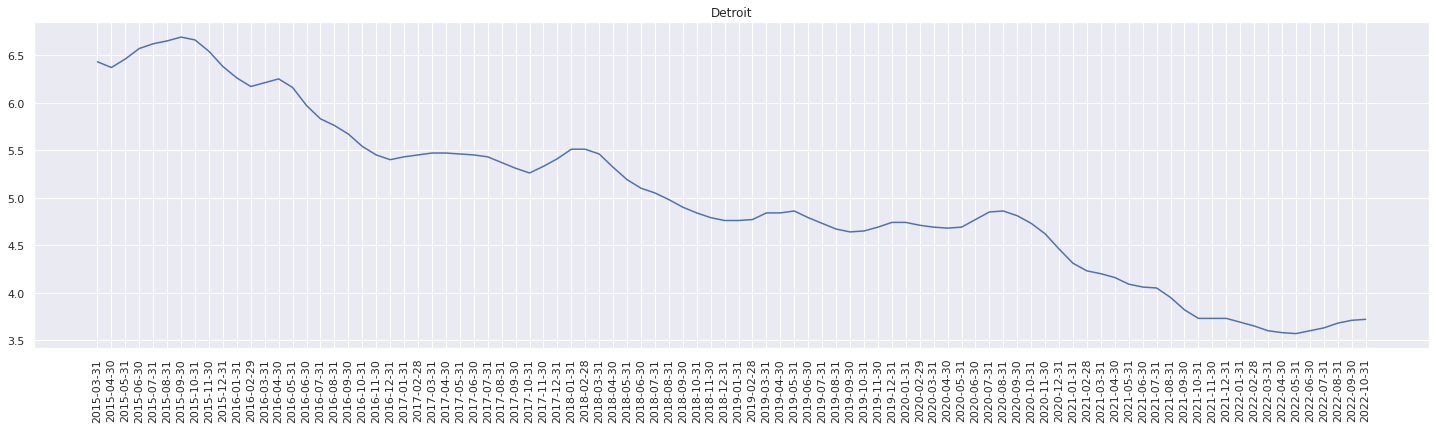

in Gary the average yield is: 3.6581690140845073
data available for 71 months


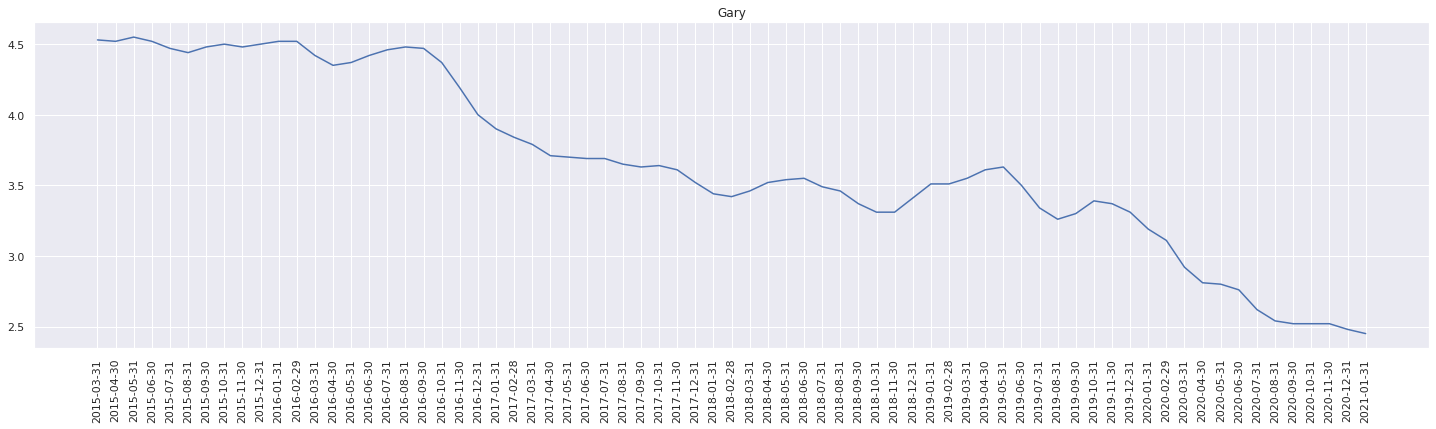

in Pontiac the average yield is: 2.592111111111111
data available for 90 months


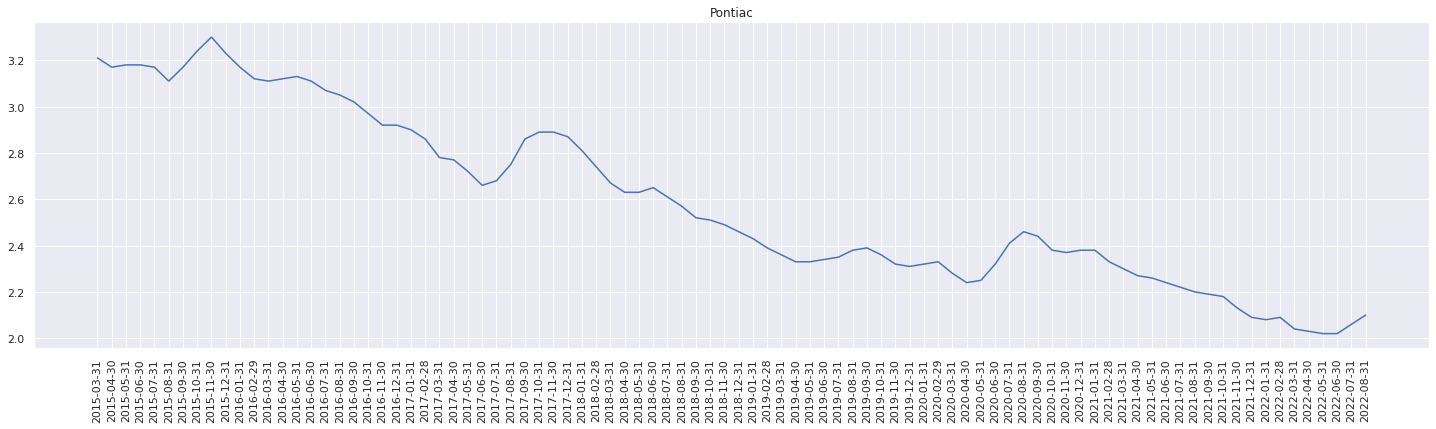

in Dayton the average yield is: 2.2556521739130435
data available for 92 months


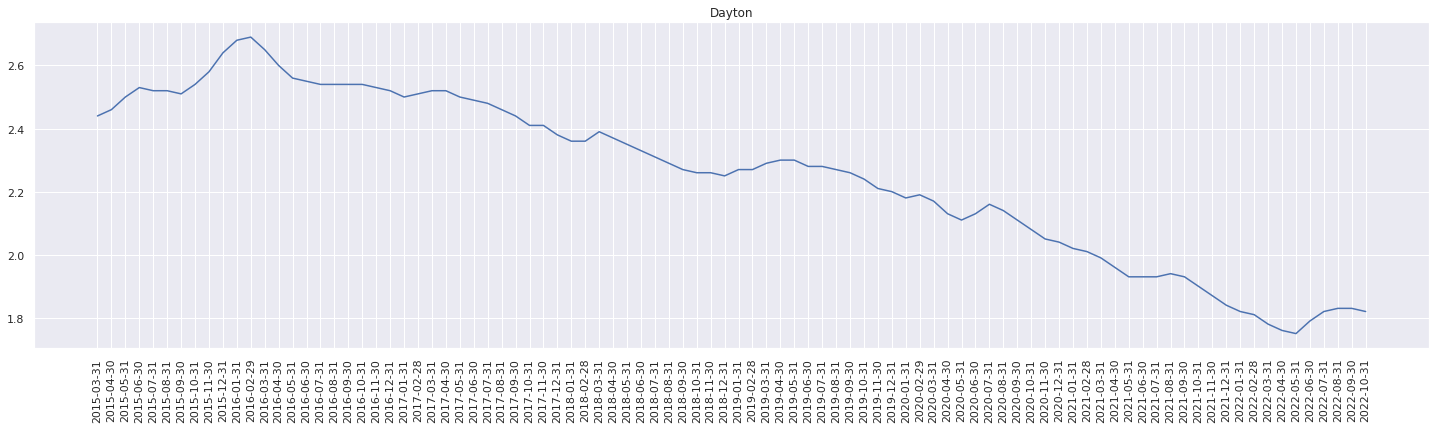

in Toledo the average yield is: 2.237282608695652
data available for 92 months


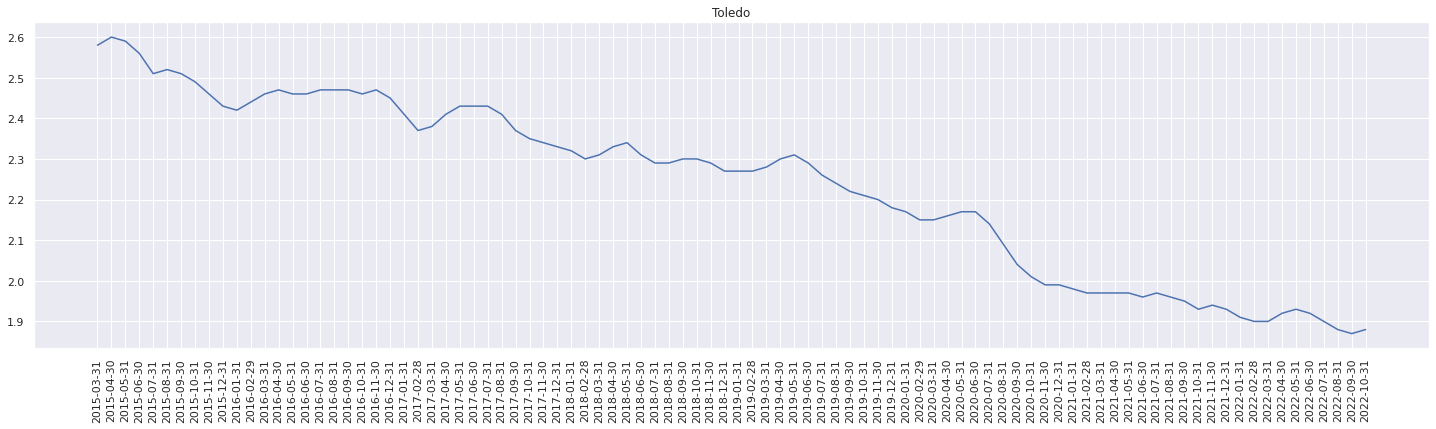

In [35]:
plots_lists(city_avg, city_yield, fields_zori)

in Glenwood Springs, CO the average yield is: 4.044625
data available for 80 months


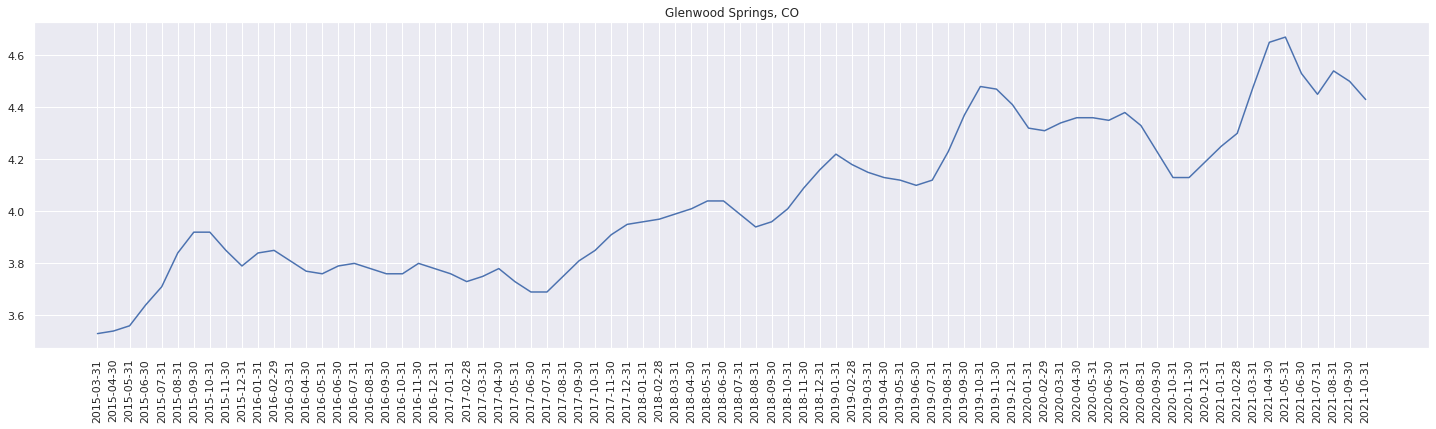

in Jackson, MS the average yield is: 1.637948717948718
data available for 78 months


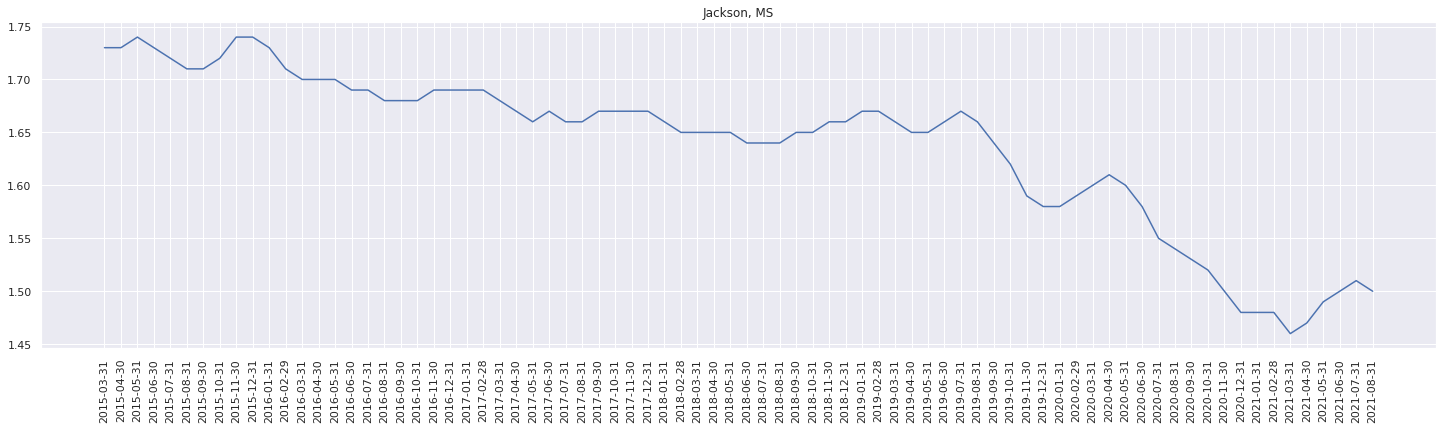

in El Paso, TX the average yield is: 1.632934782608696
data available for 92 months


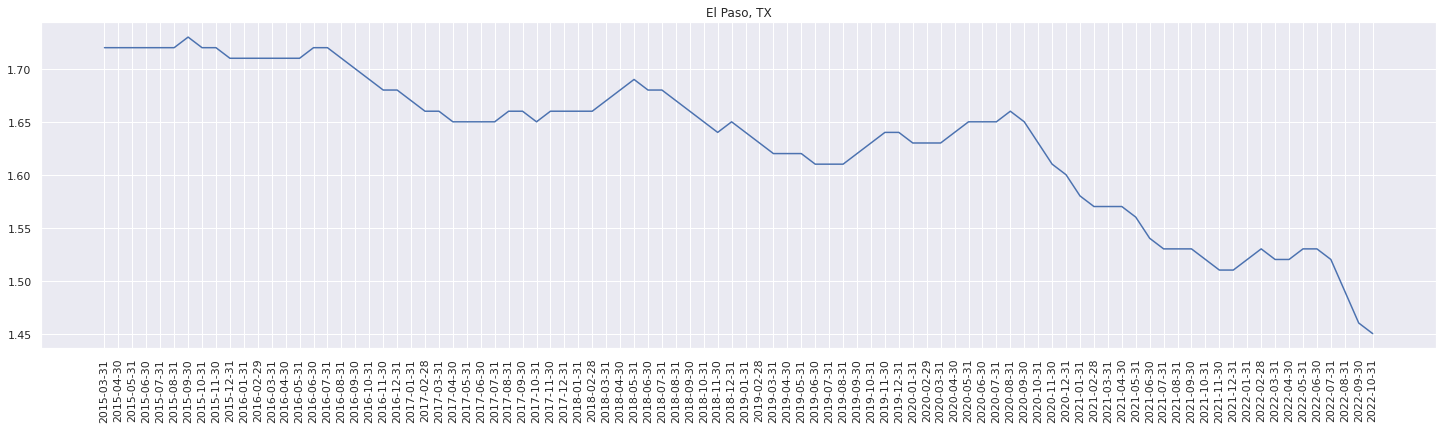

in Valdosta, GA the average yield is: 1.6163636363636364
data available for 88 months


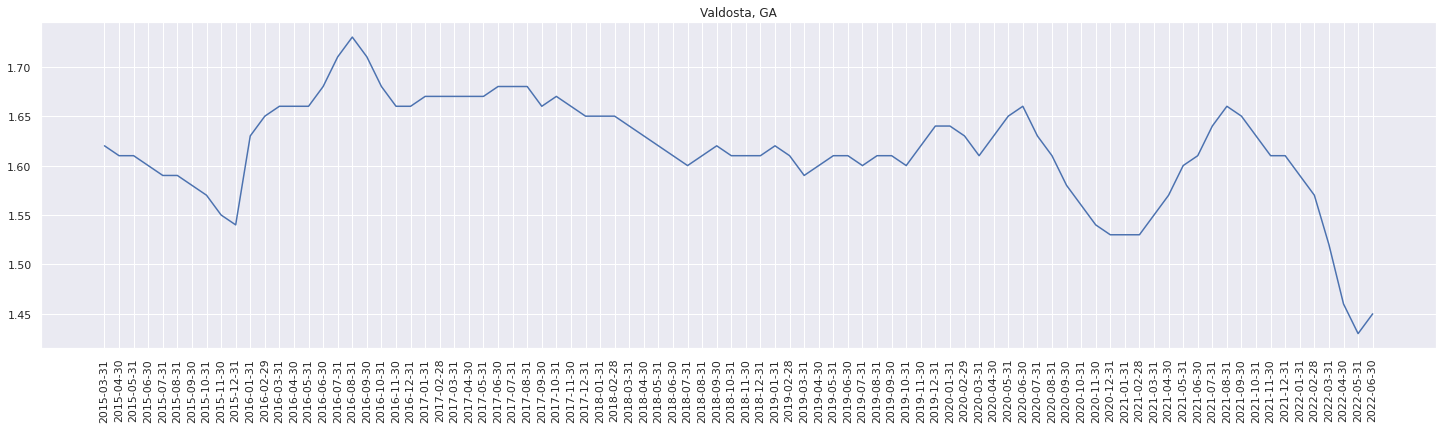

in McAllen, TX the average yield is: 1.600869565217391
data available for 92 months


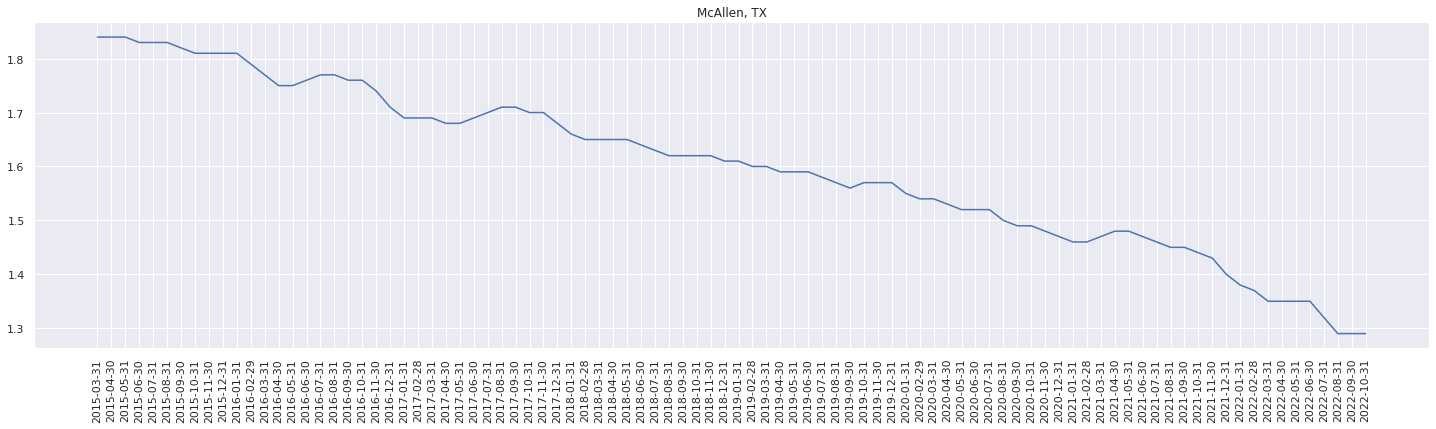

In [39]:
plots_lists(metro_avg, metro_yield, fields_zori_metro)

# Clastering Analysis - K Means - Rent Price

In [40]:
from functools import reduce
from pyspark.sql import DataFrame

#listing all dfs of bedrooms
dfs = [df_house_1br,df_house_2br,df_house_3br, df_house_4br, df_house_5br]
#union dfs into one df
df_house_price_union = reduce(DataFrame.unionAll, dfs)

In [41]:
#counting the number of rows in the df
df_house_price_union.count()

45189

In [42]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('cluster').getOrCreate()

In [43]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [44]:
df_rent.printSchema()

root
 |-- RegionID: integer (nullable = true)
 |-- SizeRank: integer (nullable = true)
 |-- RegionName: string (nullable = true)
 |-- RegionType: string (nullable = true)
 |-- StateName: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Metro: string (nullable = true)
 |-- CountyName: string (nullable = true)
 |-- 2015-03-31: double (nullable = true)
 |-- 2015-04-30: double (nullable = true)
 |-- 2015-05-31: double (nullable = true)
 |-- 2015-06-30: double (nullable = true)
 |-- 2015-07-31: double (nullable = true)
 |-- 2015-08-31: double (nullable = true)
 |-- 2015-09-30: double (nullable = true)
 |-- 2015-10-31: double (nullable = true)
 |-- 2015-11-30: double (nullable = true)
 |-- 2015-12-31: double (nullable = true)
 |-- 2016-01-31: double (nullable = true)
 |-- 2016-02-29: double (nullable = true)
 |-- 2016-03-31: double (nullable = true)
 |-- 2016-04-30: double (nullable = true)
 |-- 2016-05-31: double (nullable = true)
 |-- 2016-06-30: double (nullable = true)


In [45]:
vecCols = df_rent.columns
vecCols

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 'State',
 'Metro',
 'CountyName',
 '2015-03-31',
 '2015-04-30',
 '2015-05-31',
 '2015-06-30',
 '2015-07-31',
 '2015-08-31',
 '2015-09-30',
 '2015-10-31',
 '2015-11-30',
 '2015-12-31',
 '2016-01-31',
 '2016-02-29',
 '2016-03-31',
 '2016-04-30',
 '2016-05-31',
 '2016-06-30',
 '2016-07-31',
 '2016-08-31',
 '2016-09-30',
 '2016-10-31',
 '2016-11-30',
 '2016-12-31',
 '2017-01-31',
 '2017-02-28',
 '2017-03-31',
 '2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31',
 '2018-01-31',
 '2018-02-28',
 '2018-03-31',
 '2018-04-30',
 '2018-05-31',
 '2018-06-30',
 '2018-07-31',
 '2018-08-31',
 '2018-09-30',
 '2018-10-31',
 '2018-11-30',
 '2018-12-31',
 '2019-01-31',
 '2019-02-28',
 '2019-03-31',
 '2019-04-30',
 '2019-05-31',
 '2019-06-30',
 '2019-07-31',
 '2019-08-31',
 '2019-09-30',
 '2019-10-31',
 '2019-11-30',
 '2019-12-31',
 '2020-01-31',
 '2020-02-

In [46]:
#dropping the columns that won't be used in the ML model
df_rent_vec= df_rent.drop('RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 'State',
 'Metro',
 'CountyName')

In [47]:
#dropping NAs from the ML columns df
df_rent_vec.na.drop()

DataFrame[2015-03-31: double, 2015-04-30: double, 2015-05-31: double, 2015-06-30: double, 2015-07-31: double, 2015-08-31: double, 2015-09-30: double, 2015-10-31: double, 2015-11-30: double, 2015-12-31: double, 2016-01-31: double, 2016-02-29: double, 2016-03-31: double, 2016-04-30: double, 2016-05-31: double, 2016-06-30: double, 2016-07-31: double, 2016-08-31: double, 2016-09-30: double, 2016-10-31: double, 2016-11-30: double, 2016-12-31: double, 2017-01-31: double, 2017-02-28: double, 2017-03-31: double, 2017-04-30: double, 2017-05-31: double, 2017-06-30: double, 2017-07-31: double, 2017-08-31: double, 2017-09-30: double, 2017-10-31: double, 2017-11-30: double, 2017-12-31: double, 2018-01-31: double, 2018-02-28: double, 2018-03-31: double, 2018-04-30: double, 2018-05-31: double, 2018-06-30: double, 2018-07-31: double, 2018-08-31: double, 2018-09-30: double, 2018-10-31: double, 2018-11-30: double, 2018-12-31: double, 2019-01-31: double, 2019-02-28: double, 2019-03-31: double, 2019-04-30

In [48]:
#creating the features using the assembler
vec_assembler = VectorAssembler(inputCols = df_rent_vec.columns, outputCol='features')

In [49]:
#transforming the data
rent_final_data = vec_assembler.setHandleInvalid("skip").transform(df_rent)

In [50]:
rent_final_data.select('features').show()

+--------------------+
|            features|
+--------------------+
|[1968.91294946836...|
|[1311.52215450958...|
|[1508.05291278413...|
|[1026.25010825067...|
|[927.598077717443...|
|[1246.72311472863...|
|[1864.50680356831...|
|[1179.56522091478...|
|[1269.17660285281...|
|[2454.10255522877...|
|[1072.03145636484...|
|[812.684092141184...|
|[1113.26987602410...|
|[870.370902187141...|
|[900.614988673556...|
|[873.753179616672...|
|[1146.66524402779...|
|[1613.85558807007...|
|[1303.73110529290...|
|[1394.87632073383...|
+--------------------+
only showing top 20 rows



In [51]:
from pyspark.ml.feature import StandardScaler

In [52]:
#scaling the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [53]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(rent_final_data)

In [54]:
# Normalize each feature to have unit standard deviation.
final_data = scalerModel.transform(rent_final_data)

In [55]:
final_data.show()

+--------+--------+------------+----------+---------+-----+--------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------

In [56]:
# Trains a k-means model.
kmeans = KMeans(featuresCol='scaledFeatures',k=2)
model = kmeans.fit(final_data)

In [57]:
# Make predictions 
predictions = model.transform(final_data)
from pyspark.ml.evaluation import ClusteringEvaluator
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9877267161673386


In [58]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[2.68189133 2.68028457 2.67479191 2.68186264 2.67971686 2.68479743
 2.66011136 2.66324983 2.66243712 2.64234745 2.63969727 2.61914959
 2.63404473 2.6275867  2.65135306 2.66553339 2.66617256 2.66024141
 2.64087865 2.64376037 2.65399462 2.67887458 2.66241222 2.64497473
 2.61993019 2.62685866 2.63535998 2.65786    2.664784   2.6683633
 2.62758608 2.6346856  2.63105862 2.65273969 2.65048283 2.64191646
 2.64330117 2.6455624  2.66149096 2.67500292 2.67889211 2.67572308
 2.67223913 2.68509003 2.66393434 2.64842014 2.63025865 2.630171
 2.63899167 2.6212545  2.64319335 2.63968282 2.64727466 2.65692394
 2.64537578 2.66267017 2.66362253 2.65770548 2.64290245 2.63277305
 2.65269382 2.67797709 2.7067401  2.71634844 2.30370208 2.30844632
 2.30296529 2.32271129 2.31613789 2.32208343 2.32604552 2.33805677
 2.34340495 2.34050822 2.69119783 2.70951877 2.75631431 2.76550289
 2.75685012 2.7600079  2.68436753 2.6367518  2.60392128 2.61987364
 2.59425725 2.53815039 2.55877761 2.60816419 2.

In [59]:
#show predictions 
model.transform(final_data).select('prediction').show()

+----------+
|prediction|
+----------+
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
+----------+
only showing top 20 rows



In [60]:
#show predictions and group by the predictions and count them to see how many are in each group
model.transform(final_data).select('prediction').groupby('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|    1|
|         0|  630|
+----------+-----+



In [61]:
#transforming the final data into the kmeans for rent
Rent_Kmeans= model.transform(final_data)

In [62]:
df_rent_vec.columns

['2015-03-31',
 '2015-04-30',
 '2015-05-31',
 '2015-06-30',
 '2015-07-31',
 '2015-08-31',
 '2015-09-30',
 '2015-10-31',
 '2015-11-30',
 '2015-12-31',
 '2016-01-31',
 '2016-02-29',
 '2016-03-31',
 '2016-04-30',
 '2016-05-31',
 '2016-06-30',
 '2016-07-31',
 '2016-08-31',
 '2016-09-30',
 '2016-10-31',
 '2016-11-30',
 '2016-12-31',
 '2017-01-31',
 '2017-02-28',
 '2017-03-31',
 '2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31',
 '2018-01-31',
 '2018-02-28',
 '2018-03-31',
 '2018-04-30',
 '2018-05-31',
 '2018-06-30',
 '2018-07-31',
 '2018-08-31',
 '2018-09-30',
 '2018-10-31',
 '2018-11-30',
 '2018-12-31',
 '2019-01-31',
 '2019-02-28',
 '2019-03-31',
 '2019-04-30',
 '2019-05-31',
 '2019-06-30',
 '2019-07-31',
 '2019-08-31',
 '2019-09-30',
 '2019-10-31',
 '2019-11-30',
 '2019-12-31',
 '2020-01-31',
 '2020-02-29',
 '2020-03-31',
 '2020-04-30',
 '2020-05-31',
 '2020-06-30',
 '2020-07-31',
 '2020-08-31',
 '2020-09-

In [63]:
# group by prediciton and avg for each month. 
Rent_Kmeans.groupBy("prediction") \
    .avg('2015-03-31',
 '2015-04-30',
 '2015-05-31',
 '2015-06-30',
 '2015-07-31',
 '2015-08-31',
 '2015-09-30',
 '2015-10-31',
 '2015-11-30',
 '2015-12-31',
 '2016-01-31',
 '2016-02-29',
 '2016-03-31',
 '2016-04-30',
 '2016-05-31',
 '2016-06-30',
 '2016-07-31',
 '2016-08-31',
 '2016-09-30',
 '2016-10-31',
 '2016-11-30',
 '2016-12-31',
 '2017-01-31',
 '2017-02-28',
 '2017-03-31',
 '2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31',
 '2018-01-31',
 '2018-02-28',
 '2018-03-31',
 '2018-04-30',
 '2018-05-31',
 '2018-06-30',
 '2018-07-31',
 '2018-08-31',
 '2018-09-30',
 '2018-10-31',
 '2018-11-30',
 '2018-12-31',
 '2019-01-31',
 '2019-02-28',
 '2019-03-31',
 '2019-04-30',
 '2019-05-31',
 '2019-06-30',
 '2019-07-31',
 '2019-08-31',
 '2019-09-30',
 '2019-10-31',
 '2019-11-30',
 '2019-12-31',
 '2020-01-31',
 '2020-02-29',
 '2020-03-31',
 '2020-04-30',
 '2020-05-31',
 '2020-06-30',
 '2020-07-31',
 '2020-08-31',
 '2020-09-30',
 '2020-10-31',
 '2020-11-30',
 '2020-12-31',
 '2021-01-31',
 '2021-02-28',
 '2021-03-31',
 '2021-04-30',
 '2021-05-31',
 '2021-06-30',
 '2021-07-31',
 '2021-08-31',
 '2021-09-30',
 '2021-10-31',
 '2021-11-30',
 '2021-12-31',
 '2022-01-31',
 '2022-02-28',
 '2022-03-31',
 '2022-04-30',
 '2022-05-31',
 '2022-06-30',
 '2022-07-31',
 '2022-08-31',
 '2022-09-30',
 '2022-10-31',
 '2022-11-30') \
    .show()

+----------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+----------

In [64]:
from pyspark.sql.functions import col
#filter for only one of the predicitons and sort by the last month in a descending order
Rent_Kmeans.filter(Rent_Kmeans.prediction== "0").sort(col("2022-11-30").desc()).show()

+--------+--------+---------------+----------+---------+-----+--------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----

In [65]:
from pyspark.sql.functions import col
#filter for only one of the predicitons and sort by the last month in a descending order
Rent_Kmeans.filter(Rent_Kmeans.prediction== "1").sort(col("2022-11-30").desc()).show()

+--------+--------+----------+----------+---------+-----+--------------------+------------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+----------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-

#Clastering Analysis  - K-Means - House Value

In [66]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('cluster').getOrCreate()

In [67]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [68]:
df_house_price_union.printSchema()

root
 |-- RegionID: integer (nullable = true)
 |-- SizeRank: integer (nullable = true)
 |-- RegionName: string (nullable = true)
 |-- RegionType: string (nullable = true)
 |-- StateName: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Metro: string (nullable = true)
 |-- CountyName: string (nullable = true)
 |-- 2000-01-31: double (nullable = true)
 |-- 2000-02-29: double (nullable = true)
 |-- 2000-03-31: double (nullable = true)
 |-- 2000-04-30: double (nullable = true)
 |-- 2000-05-31: double (nullable = true)
 |-- 2000-06-30: double (nullable = true)
 |-- 2000-07-31: double (nullable = true)
 |-- 2000-08-31: double (nullable = true)
 |-- 2000-09-30: double (nullable = true)
 |-- 2000-10-31: double (nullable = true)
 |-- 2000-11-30: double (nullable = true)
 |-- 2000-12-31: double (nullable = true)
 |-- 2001-01-31: double (nullable = true)
 |-- 2001-02-28: double (nullable = true)
 |-- 2001-03-31: double (nullable = true)
 |-- 2

In [69]:
vecCols = df_house_price_union.columns
vecCols

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 'State',
 'City',
 'Metro',
 'CountyName',
 '2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 '2000-12-31',
 '2001-01-31',
 '2001-02-28',
 '2001-03-31',
 '2001-04-30',
 '2001-05-31',
 '2001-06-30',
 '2001-07-31',
 '2001-08-31',
 '2001-09-30',
 '2001-10-31',
 '2001-11-30',
 '2001-12-31',
 '2002-01-31',
 '2002-02-28',
 '2002-03-31',
 '2002-04-30',
 '2002-05-31',
 '2002-06-30',
 '2002-07-31',
 '2002-08-31',
 '2002-09-30',
 '2002-10-31',
 '2002-11-30',
 '2002-12-31',
 '2003-01-31',
 '2003-02-28',
 '2003-03-31',
 '2003-04-30',
 '2003-05-31',
 '2003-06-30',
 '2003-07-31',
 '2003-08-31',
 '2003-09-30',
 '2003-10-31',
 '2003-11-30',
 '2003-12-31',
 '2004-01-31',
 '2004-02-29',
 '2004-03-31',
 '2004-04-30',
 '2004-05-31',
 '2004-06-30',
 '2004-07-31',
 '2004-08-31',
 '2004-09-30',
 '2004-10-31',
 '2004-11-30',
 

In [70]:
#dropping the columns that won't be used in the ML model
df_house_price_union_features= df_house_price_union.drop('RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 'State',
 'City',
 'Metro',
 'CountyName')

In [71]:
#drop NAs
df_house_price_union_features.na.drop()

DataFrame[2000-01-31: double, 2000-02-29: double, 2000-03-31: double, 2000-04-30: double, 2000-05-31: double, 2000-06-30: double, 2000-07-31: double, 2000-08-31: double, 2000-09-30: double, 2000-10-31: double, 2000-11-30: double, 2000-12-31: double, 2001-01-31: double, 2001-02-28: double, 2001-03-31: double, 2001-04-30: double, 2001-05-31: double, 2001-06-30: double, 2001-07-31: double, 2001-08-31: double, 2001-09-30: double, 2001-10-31: double, 2001-11-30: double, 2001-12-31: double, 2002-01-31: double, 2002-02-28: double, 2002-03-31: double, 2002-04-30: double, 2002-05-31: double, 2002-06-30: double, 2002-07-31: double, 2002-08-31: double, 2002-09-30: double, 2002-10-31: double, 2002-11-30: double, 2002-12-31: double, 2003-01-31: double, 2003-02-28: double, 2003-03-31: double, 2003-04-30: double, 2003-05-31: double, 2003-06-30: double, 2003-07-31: double, 2003-08-31: double, 2003-09-30: double, 2003-10-31: double, 2003-11-30: double, 2003-12-31: double, 2004-01-31: double, 2004-02-29

In [72]:
#create features column
vec_assembler = VectorAssembler(inputCols = df_house_price_union_features.columns, outputCol='features')

In [73]:
#transform data using assembler
house_value_final_data = vec_assembler.setHandleInvalid("skip").transform(df_house_price_union)

In [74]:
house_value_final_data.select('features').show()

+--------------------+
|            features|
+--------------------+
|[39989.0,39886.0,...|
|[80514.0,80451.0,...|
|[294584.0,296606....|
|[129437.0,128129....|
|[312260.0,316051....|
|[72771.0,72585.0,...|
|[93584.0,92973.0,...|
|[56195.0,56452.0,...|
|[125569.0,126896....|
|[110895.0,110432....|
|[60199.0,60305.0,...|
|[105261.0,105141....|
|[76935.0,76818.0,...|
|[56314.0,56269.0,...|
|[146469.0,147115....|
|[110071.0,111881....|
|[93694.0,94944.0,...|
|[77565.0,77863.0,...|
|[52202.0,52101.0,...|
|[176046.0,176905....|
+--------------------+
only showing top 20 rows



In [75]:
from pyspark.ml.feature import StandardScaler

In [76]:
#scale the features column
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [77]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(house_value_final_data)

In [78]:
# Normalize each feature to have unit standard deviation.
final_data = scalerModel.transform(house_value_final_data)

In [79]:
final_data.show()

+--------+--------+--------------------+------------+---------+-----+-----------+--------------------+------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------

In [80]:
# Trains a k-means model.
kmeans = KMeans(featuresCol='scaledFeatures',k=2)
model = kmeans.fit(final_data)

In [81]:
# Make predictions 
predictions = model.transform(final_data)
from pyspark.ml.evaluation import ClusteringEvaluator
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.8550982556519952


In [82]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[0.86814733 0.86607602 0.86265326 0.85452265 0.84541508 0.83576357
 0.82768557 0.81940486 0.811641   0.80465956 0.79737804 0.7906447
 0.78271814 0.77604071 0.77036211 0.76662767 0.76515727 0.76616623
 0.76879087 0.77173728 0.77485301 0.7789603  0.78403488 0.7897561
 0.79367246 0.79523404 0.79452268 0.79345969 0.79200947 0.79079742
 0.78945173 0.78910287 0.78877333 0.78887899 0.78844786 0.78859686
 0.78812047 0.78693256 0.78644092 0.78755343 0.7910055  0.7946873
 0.79757616 0.79990688 0.80077922 0.80218166 0.80268307 0.80252361
 0.79988494 0.79722247 0.79518338 0.79339752 0.7909307  0.78919027
 0.78947484 0.79053596 0.78977558 0.78730771 0.78513834 0.78345295
 0.78249398 0.78019073 0.77813073 0.77746683 0.77741015 0.77896113
 0.78013427 0.78246954 0.78398426 0.78449886 0.78597093 0.78691292
 0.78738186 0.78828796 0.79049265 0.7942907  0.79692573 0.79898517
 0.80133877 0.8036506  0.8060311  0.80777449 0.80848272 0.80741761
 0.8063484  0.80535392 0.8050089  0.80411866 0.

In [83]:
#show prediction
model.transform(final_data).select('prediction').show()

+----------+
|prediction|
+----------+
|         0|
|         0|
|         0|
|         0|
|         1|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
+----------+
only showing top 20 rows



In [84]:
#group by prediction and count the observation for each group
model.transform(final_data).select('prediction').groupby('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 2103|
|         0|16295|
+----------+-----+



In [85]:
#transform the data into k-means model
house_value_Kmeans= model.transform(final_data)

In [86]:
house_value_Kmeans.columns

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 'State',
 'City',
 'Metro',
 'CountyName',
 '2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 '2000-12-31',
 '2001-01-31',
 '2001-02-28',
 '2001-03-31',
 '2001-04-30',
 '2001-05-31',
 '2001-06-30',
 '2001-07-31',
 '2001-08-31',
 '2001-09-30',
 '2001-10-31',
 '2001-11-30',
 '2001-12-31',
 '2002-01-31',
 '2002-02-28',
 '2002-03-31',
 '2002-04-30',
 '2002-05-31',
 '2002-06-30',
 '2002-07-31',
 '2002-08-31',
 '2002-09-30',
 '2002-10-31',
 '2002-11-30',
 '2002-12-31',
 '2003-01-31',
 '2003-02-28',
 '2003-03-31',
 '2003-04-30',
 '2003-05-31',
 '2003-06-30',
 '2003-07-31',
 '2003-08-31',
 '2003-09-30',
 '2003-10-31',
 '2003-11-30',
 '2003-12-31',
 '2004-01-31',
 '2004-02-29',
 '2004-03-31',
 '2004-04-30',
 '2004-05-31',
 '2004-06-30',
 '2004-07-31',
 '2004-08-31',
 '2004-09-30',
 '2004-10-31',
 '2004-11-30',
 

In [87]:
#group by prediciton and avg per month
house_value_Kmeans.groupBy("prediction") \
    .avg('2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 '2000-12-31',
 '2001-01-31',
 '2001-02-28',
 '2001-03-31',
 '2001-04-30',
 '2001-05-31',
 '2001-06-30',
 '2001-07-31',
 '2001-08-31',
 '2001-09-30',
 '2001-10-31',
 '2001-11-30',
 '2001-12-31',
 '2002-01-31',
 '2002-02-28',
 '2002-03-31',
 '2002-04-30',
 '2002-05-31',
 '2002-06-30',
 '2002-07-31',
 '2002-08-31',
 '2002-09-30',
 '2002-10-31',
 '2002-11-30',
 '2002-12-31',
 '2003-01-31',
 '2003-02-28',
 '2003-03-31',
 '2003-04-30',
 '2003-05-31',
 '2003-06-30',
 '2003-07-31',
 '2003-08-31',
 '2003-09-30',
 '2003-10-31',
 '2003-11-30',
 '2003-12-31',
 '2004-01-31',
 '2004-02-29',
 '2004-03-31',
 '2004-04-30',
 '2004-05-31',
 '2004-06-30',
 '2004-07-31',
 '2004-08-31',
 '2004-09-30',
 '2004-10-31',
 '2004-11-30',
 '2004-12-31',
 '2005-01-31',
 '2005-02-28',
 '2005-03-31',
 '2005-04-30',
 '2005-05-31',
 '2005-06-30',
 '2005-07-31',
 '2005-08-31',
 '2005-09-30',
 '2005-10-31',
 '2005-11-30',
 '2005-12-31',
 '2006-01-31',
 '2006-02-28',
 '2006-03-31',
 '2006-04-30',
 '2006-05-31',
 '2006-06-30',
 '2006-07-31',
 '2006-08-31',
 '2006-09-30',
 '2006-10-31',
 '2006-11-30',
 '2006-12-31',
 '2007-01-31',
 '2007-02-28',
 '2007-03-31',
 '2007-04-30',
 '2007-05-31',
 '2007-06-30',
 '2007-07-31',
 '2007-08-31',
 '2007-09-30',
 '2007-10-31',
 '2007-11-30',
 '2007-12-31',
 '2008-01-31',
 '2008-02-29',
 '2008-03-31',
 '2008-04-30',
 '2008-05-31',
 '2008-06-30',
 '2008-07-31',
 '2008-08-31',
 '2008-09-30',
 '2008-10-31',
 '2008-11-30',
 '2008-12-31',
 '2009-01-31',
 '2009-02-28',
 '2009-03-31',
 '2009-04-30',
 '2009-05-31',
 '2009-06-30',
 '2009-07-31',
 '2009-08-31',
 '2009-09-30',
 '2009-10-31',
 '2009-11-30',
 '2009-12-31',
 '2010-01-31',
 '2010-02-28',
 '2010-03-31',
 '2010-04-30',
 '2010-05-31',
 '2010-06-30',
 '2010-07-31',
 '2010-08-31',
 '2010-09-30',
 '2010-10-31',
 '2010-11-30',
 '2010-12-31',
 '2011-01-31',
 '2011-02-28',
 '2011-03-31',
 '2011-04-30',
 '2011-05-31',
 '2011-06-30',
 '2011-07-31',
 '2011-08-31',
 '2011-09-30',
 '2011-10-31',
 '2011-11-30',
 '2011-12-31',
 '2012-01-31',
 '2012-02-29',
 '2012-03-31',
 '2012-04-30',
 '2012-05-31',
 '2012-06-30',
 '2012-07-31',
 '2012-08-31',
 '2012-09-30',
 '2012-10-31',
 '2012-11-30',
 '2012-12-31',
 '2013-01-31',
 '2013-02-28',
 '2013-03-31',
 '2013-04-30',
 '2013-05-31',
 '2013-06-30',
 '2013-07-31',
 '2013-08-31',
 '2013-09-30',
 '2013-10-31',
 '2013-11-30',
 '2013-12-31',
 '2014-01-31',
 '2014-02-28',
 '2014-03-31',
 '2014-04-30',
 '2014-05-31',
 '2014-06-30',
 '2014-07-31',
 '2014-08-31',
 '2014-09-30',
 '2014-10-31',
 '2014-11-30',
 '2014-12-31',
 '2015-01-31',
 '2015-02-28',
 '2015-03-31',
 '2015-04-30',
 '2015-05-31',
 '2015-06-30',
 '2015-07-31',
 '2015-08-31',
 '2015-09-30',
 '2015-10-31',
 '2015-11-30',
 '2015-12-31',
 '2016-01-31',
 '2016-02-29',
 '2016-03-31',
 '2016-04-30',
 '2016-05-31',
 '2016-06-30',
 '2016-07-31',
 '2016-08-31',
 '2016-09-30',
 '2016-10-31',
 '2016-11-30',
 '2016-12-31',
 '2017-01-31',
 '2017-02-28',
 '2017-03-31',
 '2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31',
 '2018-01-31',
 '2018-02-28',
 '2018-03-31',
 '2018-04-30',
 '2018-05-31',
 '2018-06-30',
 '2018-07-31',
 '2018-08-31',
 '2018-09-30',
 '2018-10-31',
 '2018-11-30',
 '2018-12-31',
 '2019-01-31',
 '2019-02-28',
 '2019-03-31',
 '2019-04-30',
 '2019-05-31',
 '2019-06-30',
 '2019-07-31',
 '2019-08-31',
 '2019-09-30',
 '2019-10-31',
 '2019-11-30',
 '2019-12-31',
 '2020-01-31',
 '2020-02-29',
 '2020-03-31',
 '2020-04-30',
 '2020-05-31',
 '2020-06-30',
 '2020-07-31',
 '2020-08-31',
 '2020-09-30',
 '2020-10-31',
 '2020-11-30',
 '2020-12-31',
 '2021-01-31',
 '2021-02-28',
 '2021-03-31',
 '2021-04-30',
 '2021-05-31',
 '2021-06-30',
 '2021-07-31',
 '2021-08-31',
 '2021-09-30',
 '2021-10-31',
 '2021-11-30',
 '2021-12-31',
 '2022-01-31',
 '2022-02-28',
 '2022-03-31',
 '2022-04-30',
 '2022-05-31',
 '2022-06-30',
 '2022-07-31',
 '2022-08-31',
 '2022-09-30',
 '2022-10-31',
 '2022-11-30') \
    .show()

+----------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------

In [97]:
from pyspark.sql.functions import col
#filter for only one of the predicitons and sort by the last month in a descending order
house_value_Kmeans.filter(house_value_Kmeans.prediction== "0").sort(col("2022-11-30").desc()).show()

+--------+--------+--------------------+------------+---------+-----+---------------+--------------------+------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+------

In [98]:
#filter for only one of the predicitons and sort by the last month in a descending order
house_value_Kmeans.filter(house_value_Kmeans.prediction== "1").sort(col("2022-11-30").desc()).show()

+--------+--------+--------------------+------------+---------+-----+-------------+--------------------+--------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+------

#Clastering Analysis - K-Means - For Sale Inventory

In [99]:
from pyspark.sql import SparkSession
#initiate spark session
spark = SparkSession.builder.appName('cluster').getOrCreate()

In [100]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [101]:
df_for_sale_inventory.printSchema()

root
 |-- RegionID: integer (nullable = true)
 |-- SizeRank: integer (nullable = true)
 |-- RegionName: string (nullable = true)
 |-- RegionType: string (nullable = true)
 |-- StateName: string (nullable = true)
 |-- 2018-01-27: double (nullable = true)
 |-- 2018-02-03: double (nullable = true)
 |-- 2018-02-10: double (nullable = true)
 |-- 2018-02-17: double (nullable = true)
 |-- 2018-02-24: double (nullable = true)
 |-- 2018-03-03: double (nullable = true)
 |-- 2018-03-10: double (nullable = true)
 |-- 2018-03-17: double (nullable = true)
 |-- 2018-03-24: double (nullable = true)
 |-- 2018-03-31: double (nullable = true)
 |-- 2018-04-07: double (nullable = true)
 |-- 2018-04-14: double (nullable = true)
 |-- 2018-04-21: double (nullable = true)
 |-- 2018-04-28: double (nullable = true)
 |-- 2018-05-05: double (nullable = true)
 |-- 2018-05-12: double (nullable = true)
 |-- 2018-05-19: double (nullable = true)
 |-- 2018-05-26: double (nullable = true)
 |-- 2018-06-02: double (nullabl

In [102]:
vecCols = df_for_sale_inventory.columns
vecCols

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 '2018-01-27',
 '2018-02-03',
 '2018-02-10',
 '2018-02-17',
 '2018-02-24',
 '2018-03-03',
 '2018-03-10',
 '2018-03-17',
 '2018-03-24',
 '2018-03-31',
 '2018-04-07',
 '2018-04-14',
 '2018-04-21',
 '2018-04-28',
 '2018-05-05',
 '2018-05-12',
 '2018-05-19',
 '2018-05-26',
 '2018-06-02',
 '2018-06-09',
 '2018-06-16',
 '2018-06-23',
 '2018-06-30',
 '2018-07-07',
 '2018-07-14',
 '2018-07-21',
 '2018-07-28',
 '2018-08-04',
 '2018-08-11',
 '2018-08-18',
 '2018-08-25',
 '2018-09-01',
 '2018-09-08',
 '2018-09-15',
 '2018-09-22',
 '2018-09-29',
 '2018-10-06',
 '2018-10-13',
 '2018-10-20',
 '2018-10-27',
 '2018-11-03',
 '2018-11-10',
 '2018-11-17',
 '2018-11-24',
 '2018-12-01',
 '2018-12-08',
 '2018-12-15',
 '2018-12-22',
 '2018-12-29',
 '2019-01-05',
 '2019-01-12',
 '2019-01-19',
 '2019-01-26',
 '2019-02-02',
 '2019-02-09',
 '2019-02-16',
 '2019-02-23',
 '2019-03-02',
 '2019-03-09',
 '2019-03-16',
 '2019-03-23',
 '2019-03-30',


In [103]:
#drop columns for the features column
df_for_sale_inventory_features= df_for_sale_inventory.drop('RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName')

In [104]:
#drop NAs 
df_for_sale_inventory_features.na.drop()

DataFrame[2018-01-27: double, 2018-02-03: double, 2018-02-10: double, 2018-02-17: double, 2018-02-24: double, 2018-03-03: double, 2018-03-10: double, 2018-03-17: double, 2018-03-24: double, 2018-03-31: double, 2018-04-07: double, 2018-04-14: double, 2018-04-21: double, 2018-04-28: double, 2018-05-05: double, 2018-05-12: double, 2018-05-19: double, 2018-05-26: double, 2018-06-02: double, 2018-06-09: double, 2018-06-16: double, 2018-06-23: double, 2018-06-30: double, 2018-07-07: double, 2018-07-14: double, 2018-07-21: double, 2018-07-28: double, 2018-08-04: double, 2018-08-11: double, 2018-08-18: double, 2018-08-25: double, 2018-09-01: double, 2018-09-08: double, 2018-09-15: double, 2018-09-22: double, 2018-09-29: double, 2018-10-06: double, 2018-10-13: double, 2018-10-20: double, 2018-10-27: double, 2018-11-03: double, 2018-11-10: double, 2018-11-17: double, 2018-11-24: double, 2018-12-01: double, 2018-12-08: double, 2018-12-15: double, 2018-12-22: double, 2018-12-29: double, 2019-01-05

In [105]:
#create the features column
vec_assembler = VectorAssembler(inputCols = df_for_sale_inventory_features.columns, outputCol='features')

In [106]:
#transform the data into final data
for_sale_inventory_final_data = vec_assembler.setHandleInvalid("skip").transform(df_for_sale_inventory)

In [107]:
for_sale_inventory_final_data.select('features').show()

+--------------------+
|            features|
+--------------------+
|[54296.0,54940.0,...|
|[17243.0,17536.0,...|
|[19173.0,19163.0,...|
|[13778.0,13916.0,...|
|[18659.0,18745.0,...|
|[19764.0,20207.0,...|
|[5692.0,5661.0,56...|
|[2399.0,2600.0,27...|
|[13469.0,13682.0,...|
|[10170.0,10041.0,...|
|[3999.0,4048.0,40...|
|[6599.0,6608.0,67...|
|[4508.0,4594.0,46...|
|[13422.0,13596.0,...|
|[4610.0,4716.0,47...|
|[6370.0,6471.0,65...|
|[5155.0,5097.0,50...|
|[3717.0,3751.0,37...|
|[8933.0,8882.0,88...|
|[5019.0,5018.0,50...|
+--------------------+
only showing top 20 rows



In [108]:
from pyspark.ml.feature import StandardScaler

In [109]:
#scale features into scaled features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [110]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(for_sale_inventory_final_data)

In [111]:
# Normalize each feature to have unit standard deviation.
final_data = scalerModel.transform(for_sale_inventory_final_data)

In [112]:
final_data.show()

+--------+--------+-----------------+----------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-------

In [113]:
# Trains a k-means model.
kmeans = KMeans(featuresCol='scaledFeatures',k=3)
model = kmeans.fit(final_data)

In [114]:
# Make predictions 
predictions = model.transform(final_data)
from pyspark.ml.evaluation import ClusteringEvaluator
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9631332034705788


In [115]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[0.1979568  0.19588995 0.19218866 0.18956247 0.18699423 0.18422121
 0.1830639  0.181577   0.18027989 0.17924935 0.17858732 0.17763533
 0.17639679 0.1753861  0.17414191 0.17339392 0.17307397 0.17335313
 0.17402952 0.1745944  0.17547374 0.17589344 0.1764894  0.17752511
 0.17832296 0.17921603 0.1798565  0.18032369 0.18095136 0.18177705
 0.18266034 0.183705   0.18411028 0.18381332 0.18306397 0.18177544
 0.18071506 0.17985795 0.17917963 0.1785042  0.17806198 0.17768251
 0.17756081 0.17782236 0.17814868 0.178297   0.17848022 0.1787416
 0.17926819 0.17986729 0.1799161  0.17913206 0.17751769 0.17591084
 0.17423674 0.17240692 0.17081372 0.16897803 0.16709674 0.16543998
 0.16381298 0.16231207 0.16092482 0.15944511 0.15862635 0.15802195
 0.15741724 0.15715408 0.1563632  0.15607453 0.15598157 0.15600952
 0.15642881 0.15667567 0.15722635 0.15807769 0.15889026 0.15990107
 0.16099695 0.16184421 0.16286894 0.1638699  0.16492499 0.16642356
 0.16726463 0.16740554 0.167134   0.16625523 

In [116]:
#show predictions 
model.transform(final_data).select('prediction').show()

+----------+
|prediction|
+----------+
|         1|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         2|
|         0|
|         2|
|         2|
+----------+
only showing top 20 rows



In [117]:
#group by prediction and count the number of rows per group
model.transform(final_data).select('prediction').groupby('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|    1|
|         2|   21|
|         0|  603|
+----------+-----+



In [118]:
#transform the data and create k-means
for_sale_inventory_final_data_Kmeans= model.transform(final_data)

In [119]:
for_sale_inventory_final_data.columns

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 '2018-01-27',
 '2018-02-03',
 '2018-02-10',
 '2018-02-17',
 '2018-02-24',
 '2018-03-03',
 '2018-03-10',
 '2018-03-17',
 '2018-03-24',
 '2018-03-31',
 '2018-04-07',
 '2018-04-14',
 '2018-04-21',
 '2018-04-28',
 '2018-05-05',
 '2018-05-12',
 '2018-05-19',
 '2018-05-26',
 '2018-06-02',
 '2018-06-09',
 '2018-06-16',
 '2018-06-23',
 '2018-06-30',
 '2018-07-07',
 '2018-07-14',
 '2018-07-21',
 '2018-07-28',
 '2018-08-04',
 '2018-08-11',
 '2018-08-18',
 '2018-08-25',
 '2018-09-01',
 '2018-09-08',
 '2018-09-15',
 '2018-09-22',
 '2018-09-29',
 '2018-10-06',
 '2018-10-13',
 '2018-10-20',
 '2018-10-27',
 '2018-11-03',
 '2018-11-10',
 '2018-11-17',
 '2018-11-24',
 '2018-12-01',
 '2018-12-08',
 '2018-12-15',
 '2018-12-22',
 '2018-12-29',
 '2019-01-05',
 '2019-01-12',
 '2019-01-19',
 '2019-01-26',
 '2019-02-02',
 '2019-02-09',
 '2019-02-16',
 '2019-02-23',
 '2019-03-02',
 '2019-03-09',
 '2019-03-16',
 '2019-03-23',
 '2019-03-30',


In [120]:
#group by prediction and avg by months
for_sale_inventory_final_data_Kmeans.groupBy("prediction") \
    .avg('2018-01-27',
 '2018-02-03',
 '2018-02-10',
 '2018-02-17',
 '2018-02-24',
 '2018-03-03',
 '2018-03-10',
 '2018-03-17',
 '2018-03-24',
 '2018-03-31',
 '2018-04-07',
 '2018-04-14',
 '2018-04-21',
 '2018-04-28',
 '2018-05-05',
 '2018-05-12',
 '2018-05-19',
 '2018-05-26',
 '2018-06-02',
 '2018-06-09',
 '2018-06-16',
 '2018-06-23',
 '2018-06-30',
 '2018-07-07',
 '2018-07-14',
 '2018-07-21',
 '2018-07-28',
 '2018-08-04',
 '2018-08-11',
 '2018-08-18',
 '2018-08-25',
 '2018-09-01',
 '2018-09-08',
 '2018-09-15',
 '2018-09-22',
 '2018-09-29',
 '2018-10-06',
 '2018-10-13',
 '2018-10-20',
 '2018-10-27',
 '2018-11-03',
 '2018-11-10',
 '2018-11-17',
 '2018-11-24',
 '2018-12-01',
 '2018-12-08',
 '2018-12-15',
 '2018-12-22',
 '2018-12-29',
 '2019-01-05',
 '2019-01-12',
 '2019-01-19',
 '2019-01-26',
 '2019-02-02',
 '2019-02-09',
 '2019-02-16',
 '2019-02-23',
 '2019-03-02',
 '2019-03-09',
 '2019-03-16',
 '2019-03-23',
 '2019-03-30',
 '2019-04-06',
 '2019-04-13',
 '2019-04-20',
 '2019-04-27',
 '2019-05-04',
 '2019-05-11',
 '2019-05-18',
 '2019-05-25',
 '2019-06-01',
 '2019-06-08',
 '2019-06-15',
 '2019-06-22',
 '2019-06-29',
 '2019-07-06',
 '2019-07-13',
 '2019-07-20',
 '2019-07-27',
 '2019-08-03',
 '2019-08-10',
 '2019-08-17',
 '2019-08-24',
 '2019-08-31',
 '2019-09-07',
 '2019-09-14',
 '2019-09-21',
 '2019-09-28',
 '2019-10-05',
 '2019-10-12',
 '2019-10-19',
 '2019-10-26',
 '2019-11-02',
 '2019-11-09',
 '2019-11-16',
 '2019-11-23',
 '2019-11-30',
 '2019-12-07',
 '2019-12-14',
 '2019-12-21',
 '2019-12-28',
 '2020-01-04',
 '2020-01-11',
 '2020-01-18',
 '2020-01-25',
 '2020-02-01',
 '2020-02-08',
 '2020-02-15',
 '2020-02-22',
 '2020-02-29',
 '2020-03-07',
 '2020-03-14',
 '2020-03-21',
 '2020-03-28',
 '2020-04-04',
 '2020-04-11',
 '2020-04-18',
 '2020-04-25',
 '2020-05-02',
 '2020-05-09',
 '2020-05-16',
 '2020-05-23',
 '2020-05-30',
 '2020-06-06',
 '2020-06-13',
 '2020-06-20',
 '2020-06-27',
 '2020-07-04',
 '2020-07-11',
 '2020-07-18',
 '2020-07-25',
 '2020-08-01',
 '2020-08-08',
 '2020-08-15',
 '2020-08-22',
 '2020-08-29',
 '2020-09-05',
 '2020-09-12',
 '2020-09-19',
 '2020-09-26',
 '2020-10-03',
 '2020-10-10',
 '2020-10-17',
 '2020-10-24',
 '2020-10-31',
 '2020-11-07',
 '2020-11-14',
 '2020-11-21',
 '2020-11-28',
 '2020-12-05',
 '2020-12-12',
 '2020-12-19',
 '2020-12-26',
 '2021-01-02',
 '2021-01-09',
 '2021-01-16',
 '2021-01-23',
 '2021-01-30',
 '2021-02-06',
 '2021-02-13',
 '2021-02-20',
 '2021-02-27',
 '2021-03-06',
 '2021-03-13',
 '2021-03-20',
 '2021-03-27',
 '2021-04-03',
 '2021-04-10',
 '2021-04-17',
 '2021-04-24',
 '2021-05-01',
 '2021-05-08',
 '2021-05-15',
 '2021-05-22',
 '2021-05-29',
 '2021-06-05',
 '2021-06-12',
 '2021-06-19',
 '2021-06-26',
 '2021-07-03',
 '2021-07-10',
 '2021-07-17',
 '2021-07-24',
 '2021-07-31',
 '2021-08-07',
 '2021-08-14',
 '2021-08-21',
 '2021-08-28',
 '2021-09-04',
 '2021-09-11',
 '2021-09-18',
 '2021-09-25',
 '2021-10-02',
 '2021-10-09',
 '2021-10-16',
 '2021-10-23',
 '2021-10-30',
 '2021-11-06',
 '2021-11-13',
 '2021-11-20',
 '2021-11-27',
 '2021-12-04',
 '2021-12-11',
 '2021-12-18',
 '2021-12-25',
 '2022-01-01',
 '2022-01-08',
 '2022-01-15',
 '2022-01-22',
 '2022-01-29',
 '2022-02-05',
 '2022-02-12',
 '2022-02-19',
 '2022-02-26',
 '2022-03-05',
 '2022-03-12',
 '2022-03-19',
 '2022-03-26',
 '2022-04-02',
 '2022-04-09',
 '2022-04-16',
 '2022-04-23',
 '2022-04-30',
 '2022-05-07',
 '2022-05-14',
 '2022-05-21',
 '2022-05-28',
 '2022-06-04',
 '2022-06-11',
 '2022-06-18',
 '2022-06-25',
 '2022-07-02',
 '2022-07-09',
 '2022-07-16',
 '2022-07-23',
 '2022-07-30',
 '2022-08-06',
 '2022-08-13',
 '2022-08-20',
 '2022-08-27',
 '2022-09-03',
 '2022-09-10',
 '2022-09-17',
 '2022-09-24',
 '2022-10-01',
 '2022-10-08',
 '2022-10-15',
 '2022-10-22',
 '2022-10-29',
 '2022-11-05',
 '2022-11-12',
 '2022-11-19',
 '2022-11-26',
 '2022-12-03') \
    .show()

+----------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+----------------

In [121]:
#filter for only one of the predicitons and sort by the last month in a descending order
for_sale_inventory_final_data_Kmeans.filter(for_sale_inventory_final_data_Kmeans.prediction== "0").sort("2022-12-03").show()

+--------+--------+----------------+----------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+--------

In [122]:
from pyspark.sql.functions import col
#filter for only one of the predicitons and sort by the last month in a descending order
for_sale_inventory_final_data_Kmeans.filter(for_sale_inventory_final_data_Kmeans.prediction== "1").sort("2022-12-03").show()

+--------+--------+------------+----------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-

In [123]:
#filter for only one of the predicitons and sort by the last month in a descending order
for_sale_inventory_final_data_Kmeans.filter(for_sale_inventory_final_data_Kmeans.prediction== "2").sort("2022-12-03").show()

+--------+--------+------------------+----------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+------

The cutoff is at about 200k for the lower priced houses. 
In addition, the ratio of hight house prices to low is about 1/8 while for rent it is about 1/5. this means that there are more places where rent is higher than the house prices or that our data was skewed. 
When looking at the rent data for 2022 there are some observations that were classified to the lower rent class but they are truly above the mean of the higher rent class. This classification might be due to the growth of rent over the months. 


For sale inventory-

I had to use 3 classes here since New York was a strong outlier which was its own class. 
The split is based on high, medium-high, and low number of houses listed. 
Only about 3% is in the high and medium high catagory. 

In general, based on this article- https://blog.altosresearch.com/housing-inventory-is-declining-again
IT seems like the US real estate market is at its peak. since the number of for sale inventory is very low. 